In [ ]:
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import seaborn as sns
import tensorflow as tf
import math
import sklearn.metrics as metrics
import scipy.stats.distributions as dist
import warnings
warnings.filterwarnings('ignore')

Open the file

In [ ]:
path2 = '/content/drive/MyDrive/FITS_FILES/'
cat = Table.read(path2 + 'bcnn_kinematics_r13.fits', hdu = 1)

In [ ]:
#check which to remove - maybe a couple more ??
CATID_12 = [229097,
 230719,
 422289,
 496978,
 9008500805,
 9011900392,
 9011900752,
 9011900785,
 9239900567, 
 9239900038,
 9403800272]

In [ ]:
CATID_12 = [229097,
 9239900567, 
 9239900038]

In [ ]:
CATID_12 = np.array(CATID_12)

In [ ]:
cat[0]

CATID,CATID_EXT,SAMI_FILENAME,OBS_DATE,RA,DEC,LMSTAR,Z_SPEC,Z_TONRY,GMINUSI,MU_AT_RE,GAL_FLAG,HWHM_PSF,RE,RE_CIRC_KPC,ELLIP,N_SERSIC,MTYPE,KIN_MTYPE,ENV_DIST_TO_5NN,ENV_SURFDENS,E_ENV_SURFDENS,SAMI_ISO,SAMI_CENTRAL,SAMI_SAT,HALOMASS,HALOMASS_UNIQUE,GROUP_ID,HALOMASS_WEIGHT,PA_PHOT,PA_STELKIN,E_PA_STELKIN,PA_GASKIN,E_PA_GASKIN,RMAX_VSIGMA,SIGMA_RE,E_SIGMA_RE,VRMS_RE,E_VRMS_RE,APER_CORR_FLAG,RMAX_APER_CORR,LAMBDAR_RE,E_LAMBDAR_RE,LAMBDAR_MAX,E_LAMBDAR_MAX,LAMBDAR_RE_EO,E_LAMBDAR_RE_EO,VSIGMA_RE,E_VSIGMA_RE,VSIGMA_MAX,EVSIGMA_MAX,VSIGMA_RE_EO,E_VSIGMA_RE_EO,MEAN_K51_RE,E_MEAN_K51_RE,FR_EE11,SR_EE11,FR_MC16,SR_MC16,FR_JVDS20,SR_JVDS20,PFR_JVDS20,PSR_JVDS20,INTRINSIC_ELLIP,INCLINATION,LR_SEEING_CORRECTION,VS_SEEING_CORRECTION,HIGH_ORDER_CLASS,SIGMA_CLASS,SIGMA_OR_PROB,SIGMA_NOR_PROB,NSPAXELS_SNGT20,MEAN_SN,MEDIAN_SN,CIRC_6ARC_MEAN_SN,CIRC_6ARC_MEDIAN_SN,RE_MEAN_SN,RE_MEDIAN_SN,KIN_MEAN_SN,KIN_MEDIAN_SN,NUM_SPAXEL_CNN,SMIN,VMIN,SMAX,VMAX,RMS
int64,int64,bytes69,bytes21,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float32
7206,7206,7206_7_Y18SAR3_P002_12T122_2018_05_07-2018_05_16.fits.gz,2018_05_07-2018_05_16,176.1641,0.749569,10.48,0.09339,0.09471,0.91,21.78,0.0,0.7494104,3.1248665,4.540183,0.29915828,1.4784,2.0,6.0,1.0,1.138,0.4627,--,1.0,--,3300007829417.872,3300007829417.872,203039.0,1.0,106.22249,277.0,1.4166666,279.5,0.25,5.2,104.364845,1.8333597,103.75486,30.076302,0.0,1.0,0.65009856,0.014969519,--,--,0.7064621,0.016267376,0.86284924,0.023065692,--,--,1.0090297,0.026973391,0.034964137,0.008393184,1.0,--,1.0,--,1.0,--,1.0,--,0.8531062,46.107323,1.2044398,1.2768883,--,1.0,0.999938428401947,6.158850010251626e-05,13.0,5.839439,4.5495257,12.71258,11.261566,14.172637,12.848637,8.904136,7.423466,238.0,0.5907127800252788,-135.18523250780555,228.03382489474672,195.4910536138038,--


In [ ]:
path2 = '/content/drive/MyDrive/FITS_FILES/'
cat = Table.read(path2 + 'bcnn_kinematics_r13.fits', hdu = 1)
# spax = cat.field('NUM_SPAXEL_CNN')
# cat = cat[np.where(spax > 90)]
print(np.shape(cat))

flag = cat.field('GAL_FLAG')
cat = cat[np.where((flag == 0) | (flag == 4))]

print('flag', np.shape(cat))

re = cat.field('RE')
cat = cat[np.where(re > 1.5)]

print('re', np.shape(cat))

psf = cat.field('HWHM_PSF')
re = cat.field('RE')
psf_re = psf/re

cat = cat[np.where(psf_re < 0.6)]

print('psf', np.shape(cat))
                     
# lam = cat.field('LAMBDAR_RE')
# cat = cat[np.where(lam > 0)]

# print('lam', np.shape(cat))

mass = cat.field('LMSTAR')
cat = cat[np.where(mass > 9.5)]

print('mass', np.shape(cat))

spax = cat.field('NUM_SPAXEL_CNN')
cat = cat[np.where(spax > 50)]

print('spax', np.shape(cat))

# for i in range(0, np.size(CATID_12)):
#   cat = cat[np.where(cat.field('CATID') != CATID_12[i])]
  
# print('12', np.shape(cat))

kin = cat.field('KIN_MTYPE')
cat = cat[np.where(kin != 4.0)]

print('fos',np.shape(cat))

lam = cat.field('LAMBDAR_RE')
cat = cat[np.where(lam > 0)]

print('lam', np.shape(cat))

(3430,)
flag (2932,)
re (2606,)
psf (2466,)
mass (1803,)
spax (1781,)
fos (1737,)
lam (1656,)


In [ ]:
mass = cat.field('LMSTAR')
cat = cat[np.where(mass < 10.5)]

print('mass', np.shape(cat))

mass (903,)


In [1]:
import scipy.stats.distributions as dist

n = 1615

k = 1475


prop = k/n

c = 0.68

p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

In [ ]:
cat[0]

CATID,CATID_EXT,SAMI_FILENAME,OBS_DATE,RA,DEC,LMSTAR,Z_SPEC,Z_TONRY,GMINUSI,MU_AT_RE,GAL_FLAG,HWHM_PSF,RE,RE_CIRC_KPC,ELLIP,N_SERSIC,MTYPE,KIN_MTYPE,ENV_DIST_TO_5NN,ENV_SURFDENS,E_ENV_SURFDENS,SAMI_ISO,SAMI_CENTRAL,SAMI_SAT,HALOMASS,HALOMASS_UNIQUE,GROUP_ID,HALOMASS_WEIGHT,PA_PHOT,PA_STELKIN,E_PA_STELKIN,PA_GASKIN,E_PA_GASKIN,RMAX_VSIGMA,SIGMA_RE,E_SIGMA_RE,VRMS_RE,E_VRMS_RE,APER_CORR_FLAG,RMAX_APER_CORR,LAMBDAR_RE,E_LAMBDAR_RE,LAMBDAR_MAX,E_LAMBDAR_MAX,LAMBDAR_RE_EO,E_LAMBDAR_RE_EO,VSIGMA_RE,E_VSIGMA_RE,VSIGMA_MAX,EVSIGMA_MAX,VSIGMA_RE_EO,E_VSIGMA_RE_EO,MEAN_K51_RE,E_MEAN_K51_RE,FR_EE11,SR_EE11,FR_MC16,SR_MC16,FR_JVDS20,SR_JVDS20,PFR_JVDS20,PSR_JVDS20,INTRINSIC_ELLIP,INCLINATION,LR_SEEING_CORRECTION,VS_SEEING_CORRECTION,HIGH_ORDER_CLASS,SIGMA_CLASS,SIGMA_OR_PROB,SIGMA_NOR_PROB,NSPAXELS_SNGT20,MEAN_SN,MEDIAN_SN,CIRC_6ARC_MEAN_SN,CIRC_6ARC_MEDIAN_SN,RE_MEAN_SN,RE_MEDIAN_SN,KIN_MEAN_SN,KIN_MEDIAN_SN,NUM_SPAXEL_CNN,SMIN,VMIN,SMAX,VMAX,RMS
int64,int64,bytes69,bytes21,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float32
7206,7206,7206_7_Y18SAR3_P002_12T122_2018_05_07-2018_05_16.fits.gz,2018_05_07-2018_05_16,176.1641,0.749569,10.48,0.09339,0.09471,0.91,21.78,0.0,0.7494104,3.1248665,4.540183,0.29915828,1.4784,2.0,6.0,1.0,1.138,0.4627,--,1.0,--,3300007829417.872,3300007829417.872,203039.0,1.0,106.22249,277.0,1.4166666,279.5,0.25,5.2,104.364845,1.8333597,103.75486,30.076302,0.0,1.0,0.65009856,0.014969519,--,--,0.7064621,0.016267376,0.86284924,0.023065692,--,--,1.0090297,0.026973391,0.034964137,0.008393184,1.0,--,1.0,--,1.0,--,1.0,--,0.8531062,46.107323,1.2044398,1.2768883,--,1.0,0.999938428401947,6.158850010251626e-05,13.0,5.839439,4.5495257,12.71258,11.261566,14.172637,12.848637,8.904136,7.423466,238.0,0.5907127800252788,-135.18523250780555,228.03382489474672,195.4910536138038,--


In [ ]:
bb = np.array(lambda_r)


In [ ]:
OR_prob2

array([0.99993843, 0.19524717, 1.        , ..., 0.9999913 , 0.99994057,
       0.02825453])

In [ ]:
bb

array([0.65009856, 0.07031041, 0.34294394, ..., 0.6757073 , 0.55972767,
       0.07281651], dtype=float32)

In [ ]:
checks

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
lambs

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [ ]:
import sklearn
from sklearn.metrics import matthews_corrcoef
lambda_cat = np.array(lambda_r)
ellip_cat = np.array(ellip)
lambs = np.linspace(0,1,101)
sigma_class2 = np.array(sigma_class)
OR_prob2 = np.array(sig_OR_prob)
checks = np.where(OR_prob2 > 0.5,1,0)

fprs = []
tprs = []
mccs = []
ppvs = []


for i in range(0,101):
  lambstart = lambs[i]
  guess = np.where((lambda_cat < lambstart + ellip/4) & (ellip_cat < 0.35 + lambstart/1.538), 0, 1)
  # plt.hist(guess)
  # plt.show()
  # print(guess)
  confusion = np.array(tf.math.confusion_matrix(labels=checks, predictions=guess))
  r = sklearn.metrics.matthews_corrcoef(checks, guess, sample_weight=None)
  # print(confusion)
  TP = confusion[0][0]
  TN = confusion[1][1]
  FP = confusion[1][0]
  FN = confusion[0][1]

  FPR = (FP/(TN+FP))
  TPR = (TP/(TP+FN))
  PPV = TP/(TP+FP)
  MCC1 = TP*TN - FP*FN
  MCC2 = np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
  MCC = MCC1/MCC2
  # print('TPR', TPR)
  # print('FPR',FPR)
  # print(PPV)
  fprs.append(FPR)
  tprs.append(TPR)
  ppvs.append(PPV)
  mccs.append(r)

fprs = np.array(fprs)
tprs = np.array(tprs)
ppvs = np.array(ppvs)
mccs = np.array(mccs)


In [ ]:
fprs

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
tprs

array([nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

(array([13.,  6.,  7.,  4.,  3.,  0.,  1.,  1.,  1.,  1.]),
 array([1.11345492e-02, 1.52974646e+00, 3.04835838e+00, 4.56697029e+00,
        6.08558220e+00, 7.60419412e+00, 9.12280603e+00, 1.06414179e+01,
        1.21600299e+01, 1.36786418e+01, 1.51972537e+01]),
 <a list of 10 Patch objects>)

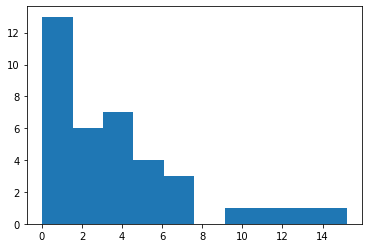

In [ ]:
plt.hist(mccs)

In [ ]:
ss = np.ones(101)*100
ss[12] = 400

In [ ]:
r = sklearn.metrics.matthews_corrcoef(y_true, y_pred, *, sample_weight=None)

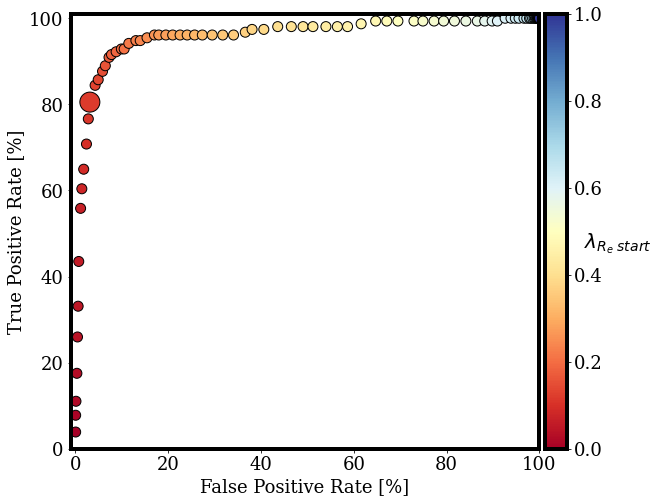

In [ ]:
plt.figure(figsize = (10,8))
plt.scatter(fprs*100,tprs*100, c= lambs, cmap = 'RdYlBu', edgecolors = 'k', s =ss)
# plt.colorbar()
plt.ylim(0,101)
plt.xlim(-1,100)
plt.xlabel('False Positive Rate [%]')
plt.ylabel('True Positive Rate [%]')
cbar = plt.colorbar(pad = 0.01)
cbar.set_label(r'$\lambda_{R_e \; start}$', rotation=0, fontsize = 20, labelpad = 15)
plt.show()

In [ ]:
tprs[12]*100

80.51948051948052

In [ ]:
fprs[12]*100

3.129161118508655

In [ ]:
fprs[10:30]

array([0.00677507, 0.01084011, 0.01693767, 0.02168022, 0.02777778,
       0.0304878 , 0.03455285, 0.04200542, 0.04810298, 0.05352304,
       0.0602981 , 0.06842818, 0.07723577, 0.08875339, 0.09891599,
       0.1097561 , 0.11585366, 0.12262873, 0.12872629, 0.14159892])

In [ ]:
tprs[17]

0.9166666666666666

In [ ]:
lambs[17]

0.17

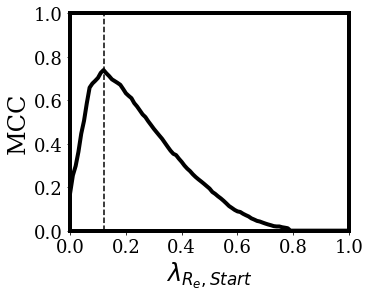

In [ ]:
plt.figure(figsize = (5,4))
plt.plot(lambs, mccs, c = 'k', linewidth = 4)
plt.axvline(0.12, ls =  '--', c = 'k')
plt.xlim(0, 1)
plt.ylim(0,1)
plt.xlabel(r'$\lambda_{R_e, Start}$', fontsize = 24)
plt.ylabel('MCC', fontsize = 24)
plt.show()

In [ ]:
np.argmax(mccs)

12

In [ ]:
lambs[12]

0.12

In [ ]:
np.shape(mccs)

(101,)

In [ ]:
# spax = cat.field('NUM_SPAXEL_CNN')
# cat_spax = cat[np.where(spax < 50)]
# # cat = cat[np.where(cat.field('CATID_EXT') != 496978)]

In [ ]:
# cat_spax

# Edit catalogue

In [ ]:
# path = '/content/drive/MyDrive/KIN_TRAINING_DATASETS/'
# vmin = np.load(path + 'vel_min_150921.npy')
# vmax = np.load(path + 'vel_max_150921.npy')
# smin = np.load(path + 'sig_min_150921.npy')
# smax = np.load(path + 'sig_max_150921.npy')


# OR_1 = np.load(path + 'OR_prob_final4_2809.npy')
# NOR_1 = np.load(path + 'NOR_prob_final4_2809.npy')
# bcnn_1 = np.load(path + 'bcnn_class_final4_2809.npy')

In [ ]:
# cat['SIGMA_CLASS'] = bcnn_1
# cat['SIGMA_OR_PROB'] = OR_1
# cat['SIGMA_NOR_PROB'] = NOR_1

In [ ]:
# cat["SMIN"] = smin
# cat["VMIN"] = vmin
# cat["SMAX"] = smax
# cat["VMAX"] = vmax

In [ ]:
# cat2 = Table.read(path2 + 'jvds_kin_mtype_cat_v040421.fits', hdu = 1)
# rms = cat2.field('RMS_VOTES')
# cat['RMS'] = rms

In [ ]:
# cat.write(path2 + 'bcnn_kinematics_r13.fits', format = 'fits')

# analysis

In [ ]:
labels_test = cat.field('SIGMA_CLASS')
OR_loc = np.where(labels_test == 1.0)
cat_OR  = cat[OR_loc]

NOR_loc = np.where(labels_test == 0.0)
cat_NOR  = cat[NOR_loc]

UNKNOWN_loc = np.where(labels_test == 2.0)
cat_UNKNOWN  = cat[UNKNOWN_loc]

In [ ]:
cat20 = cat_NOR[np.where(cat_NOR.field('LAMBDAR_RE') > 0.6)]
cat_vals = cat20.field('CATID_EXT')

In [ ]:
print(np.shape(cat_OR))
print(np.shape(cat_NOR))
print(np.shape(cat_UNKNOWN))

(1475,)
(140,)
(41,)


In [ ]:
# X_vel = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/vel_human_210721.npy')
# X_sig = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/sig_human_210721.npy')

# # X_vel = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/vel_human_190721.npy')
# # X_sig = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/sig_human_190721.npy')

# Y = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/label_human_060621.npy')
# Z = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/catid_ext_human_060621.npy')

# # stack the velocity and sigma maps 

# X_total = np.concatenate((X_vel, X_sig), axis = 3)

# # turn the data into binary labels, 0 for NORs, 1 for ORs
# Y = np.where(Y > 1, 1, 0)

# class_names = ['Non Obvious Rotator', "Obvious Rotator"]

In [ ]:
# unlabelled_vel = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/vel_notrain_200721.npy')
# unlabelled_sig = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/sig_notrain_200721.npy')
# unlabelled_catids = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/catid_ext_notrain_060621.npy')
# unlabelled_label = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/label_notrain_060621.npy')

# X_unlabelled = np.concatenate((unlabelled_vel, unlabelled_sig), axis = 3)
# Z_unlabelled = unlabelled_catids

In [ ]:
# matplotlib.rc_file_defaults()

# catids_use = guess_2[0:20]
# x = np.size(catids_use)
# x4 = int(np.floor(x/2))
# classes = ['NOR', 'OR', 'UNK']
# # pp = PdfPages('EAGLE_UNKNOWN_LAMBDA.pdf')

# if x%2 == 0:
#   fig, axs = plt.subplots(x4, 4, figsize = (20, 40))
# else:
#   fig, axs = plt.subplots(x4+1, 4, figsize = (20, 48))

# for i in range(0,x):
#   catid = catids_use[i]
#   idx = np.where(eagle_IDs == catid)[0][0]
#   velmap = eagle_maps[idx, :, :, 0]
#   sigmap = eagle_maps[idx, :, :, 1]
#   vmin1 = vmin[i]
#   idx2 = np.where(eagle_ID == catid)[0][0]
#   mass = np.round(eagle_lmsol[idx2], 4)
#   lambda_r = np.round(eagle_lambdar60[idx2], 4)
#   ellip = np.round(eagle_ellip60[idx2], 4)
#   vmin1 = np.round(eagle_minvel[idx2], 4)
#   vmax1 = np.round(eagle_maxvel[idx2], 4)
#   smin1 = np.round(eagle_minsig[idx2], 4)
#   smax1 = np.round(eagle_maxsig[idx2], 4)
#   red1 = np.round(eagle_z[idx2], 4)
#   eclass1 = classes[eagle_class[idx2]]
 
#   ang = eagle_ang[idx2]
#   radius = eagle_r50[idx2]
#   radhi = eagle_radhi[idx2]
#   a1 = (radius*2)/ang
#   b1 = -1*(ellip - 1)*a1

#   if i%2 == 0:
#     ii = int(i/2)
#     a = axs[ii, 0].imshow(velmap, cmap='RdYlBu_r', vmax = 1, vmin = 0)
#     fig.colorbar(a, ax=axs[ii, 0], fraction=0.046, pad=0.04)
#     axs[ii, 0].set_title('CATID: ' + str(catid) + '  CLASS: ' + str(eclass1) + '\n LOG MASS: ' + str(mass) + '  REDSHIFT: ' + str(red1), fontsize = 10)
#     axs[ii, 0].text(1,2,'VMIN: ' + str(vmin1), fontsize = 8)
#     axs[ii, 0].text(1,4,'VMAX: ' + str(vmax1), fontsize = 8)
#     axs[ii, 0].text(1,46,'ELLIP: ' + str(ellip), fontsize = 8)
#     axs[ii, 0].text(1,48,'LAMBDA_R: ' + str(lambda_r), fontsize = 8)
#     axs[ii, 0].add_patch(matplotlib.patches.Ellipse((25, 25), a1,b1, ls = '--', fill=False))


#     b = axs[ii, 1].imshow(sigmap, cmap='YlOrRd')
#     fig.colorbar(b, ax=axs[ii, 1], fraction=0.046, pad=0.04)
#     axs[ii, 1].set_title('CATID: ' + str(catid) + '  CLASS: ' + eclass1 + '\n LOG MASS: ' + str(mass) + '  REDSHIFT: ' + str(red1), fontsize = 10)
#     axs[ii, 1].text(1,2,'SMIN: ' + str(smin1), fontsize = 8)
#     axs[ii, 1].text(1,4,'SMAX: ' + str(smax1), fontsize = 8)
#     axs[ii, 1].text(1,46,'ELLIP: ' + str(ellip), fontsize = 8)
#     axs[ii, 1].text(1,48,'LAMBDA_R: ' + str(lambda_r), fontsize = 8)
#     axs[ii, 1].add_patch(matplotlib.patches.Ellipse((25, 25), a1,b1, ls = '--', fill=False))
  
#   else:
#     ii = int((i-1)/2)
#     a = axs[ii, 2].imshow(velmap, cmap='RdYlBu_r', vmax = 1, vmin = 0)
#     fig.colorbar(a, ax=axs[ii, 2], fraction=0.046, pad=0.04)
#     axs[ii, 2].set_title('CATID: ' + str(catid) + '  CLASS: ' + eclass1 + '\n LOG MASS: ' + str(mass) + '  REDSHIFT: ' + str(red1), fontsize = 10)
#     axs[ii, 2].text(1,2,'VMIN: ' + str(vmin1), fontsize = 8)
#     axs[ii, 2].text(1,4,'VMAX: ' + str(vmax1), fontsize = 8)
#     axs[ii, 2].text(1,46,'ELLIP: ' + str(ellip), fontsize = 8)
#     axs[ii, 2].text(1,48,'LAMBDA_R: ' + str(lambda_r), fontsize = 8)
#     axs[ii, 2].add_patch(matplotlib.patches.Ellipse((25, 25), a1,b1, ls = '--', fill=False))

#     b = axs[ii, 3].imshow(sigmap, cmap='YlOrRd')
#     axs[ii, 3].set_title('CATID: ' + str(catid) + '  CLASS: ' + eclass1 + '\n LOG MASS: ' + str(mass) + '  REDSHIFT: ' + str(red1), fontsize = 10)
#     fig.colorbar(b, ax=axs[ii, 3], fraction=0.046, pad=0.04)
#     axs[ii, 3].text(1,2,'SMIN: ' + str(smin1), fontsize = 8)
#     axs[ii, 3].text(1,4,'SMAX: ' + str(smax1), fontsize = 8)
#     axs[ii, 3].text(1,46,'ELLIP: ' + str(ellip), fontsize = 8)
#     axs[ii, 3].text(1,48,'LAMBDA_R: ' + str(lambda_r), fontsize = 8)
#     axs[ii, 3].add_patch(matplotlib.patches.Ellipse((25, 25), a1,b1, ls = '--', fill=False))

# plt.tight_layout()
# plt.show()

SELECT THE PARAMETERS

In [ ]:
# # Select galaxies above a confidence range

# confidence = 0.65

# sig_OR_prob = cat.field('SIGMA_OR_PROB')
# sig_NOR_prob = cat.field('SIGMA_NOR_PROB')
# cat = cat[np.where((sig_NOR_prob > confidence) | (sig_OR_prob > confidence))]

In [ ]:
# # Select galaxies below a confidence range

# confidence = 0.75

# sig_OR_prob = cat.field('SIGMA_OR_PROB')
# sig_NOR_prob = cat.field('SIGMA_NOR_PROB')
# cat = cat[np.where((sig_NOR_prob < confidence) & (sig_OR_prob < confidence))]

In [ ]:
# Select based on KIN_MTYPE 

kin_mtype = cat.field('KIN_MTYPE')
# cat = cat[np.where(kin_mtype > 3.5)]
cat = cat[np.where(kin_mtype < 4)]

rms = cat.field('RMS')
cat = cat[np.where(rms < 1.5)]

In [ ]:
np.shape(cat)

(490,)

In [ ]:
# lmstar = cat.field("LMSTAR")
# ellip = cat.field('ELLIP')
# lambda_r = cat.field('LAMBDAR_RE')

In [ ]:
# lmstar = np.array(lmstar)
# ellip = np.array(ellip)
# lambda_r = np.array(lambda_r)

# label_new = np.load(path + 'bcnn_class_proper_2009_3.npy')


In [ ]:
, c = 'grey'

In [ ]:
# Select based on lmstar 

lmstar = cat.field('LMSTAR')
# cat = cat[np.where(kin_mtype > 3.5)]
cat = cat[np.where(lmstar > 11.3)]


In [ ]:
guess_2 = cat.field('CATID')

In [ ]:
  kin_mtype = cat.field('KIN_MTYPE')
  test_label = np.where(kin_mtype > 1.5, 1, 0)
  
  class_1 = cat.field('SIGMA_CLASS')



In [ ]:
label_new[0]

0.0

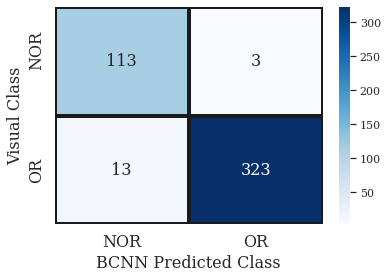

In [ ]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 4


confusion = tf.math.confusion_matrix(labels=test_labels, predictions=class_2)

array = np.array(confusion)

df_cm = pd.DataFrame(array, range(2), range(2))
sns.set(font_scale=1.4) # for label size
sns.set(font= 'DejaVu Serif')
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='.5g', cmap = "Blues", linewidths=3, linecolor='k') # font size
plt.ylabel("Visual Class", fontsize = 16)
plt.xlabel('BCNN Predicted Class', fontsize = 16)
plt.xticks(ticks = (0.5, 1.5), labels = ('NOR', 'OR'), fontsize = 16)
plt.yticks(ticks = (0.4, 1.5), labels = ('NOR', 'OR'), fontsize = 16)
# plt.title('CONFUSION MATRIX')

plt.show()

# Define some parameters for each catalogue

In [ ]:
labels_test = cat.field('SIGMA_CLASS')
OR_loc = np.where(labels_test == 1.0)
cat_OR  = cat[OR_loc]

NOR_loc = np.where(labels_test == 0.0)
cat_NOR  = cat[NOR_loc]

UNKNOWN_loc = np.where(labels_test == 2.0)
cat_UNKNOWN  = cat[UNKNOWN_loc]

In [ ]:
cat_NOR_test = cat_NOR[np.where(lambda_r_NOR > 0.3)]
# lambdartest = cat_NOR_test.field('LAMBDAR_RE')
# cat_NOR_test = cat_NOR_test[np.where(lambdartest > 0)]

In [ ]:
cat_NOR_test

CATID,CATID_EXT,SAMI_FILENAME,OBS_DATE,RA,DEC,LMSTAR,Z_SPEC,Z_TONRY,GMINUSI,MU_AT_RE,GAL_FLAG,HWHM_PSF,RE,RE_CIRC_KPC,ELLIP,N_SERSIC,MTYPE,KIN_MTYPE,ENV_DIST_TO_5NN,ENV_SURFDENS,E_ENV_SURFDENS,SAMI_ISO,SAMI_CENTRAL,SAMI_SAT,HALOMASS,HALOMASS_UNIQUE,GROUP_ID,HALOMASS_WEIGHT,PA_PHOT,PA_STELKIN,E_PA_STELKIN,PA_GASKIN,E_PA_GASKIN,RMAX_VSIGMA,SIGMA_RE,E_SIGMA_RE,VRMS_RE,E_VRMS_RE,APER_CORR_FLAG,RMAX_APER_CORR,LAMBDAR_RE,E_LAMBDAR_RE,LAMBDAR_MAX,E_LAMBDAR_MAX,LAMBDAR_RE_EO,E_LAMBDAR_RE_EO,VSIGMA_RE,E_VSIGMA_RE,VSIGMA_MAX,EVSIGMA_MAX,VSIGMA_RE_EO,E_VSIGMA_RE_EO,MEAN_K51_RE,E_MEAN_K51_RE,FR_EE11,SR_EE11,FR_MC16,SR_MC16,FR_JVDS20,SR_JVDS20,PFR_JVDS20,PSR_JVDS20,INTRINSIC_ELLIP,INCLINATION,LR_SEEING_CORRECTION,VS_SEEING_CORRECTION,HIGH_ORDER_CLASS,SIGMA_CLASS,SIGMA_OR_PROB,SIGMA_NOR_PROB,NSPAXELS_SNGT20,MEAN_SN,MEDIAN_SN,CIRC_6ARC_MEAN_SN,CIRC_6ARC_MEDIAN_SN,RE_MEAN_SN,RE_MEDIAN_SN,KIN_MEAN_SN,KIN_MEDIAN_SN,NUM_SPAXEL_CNN,SMIN,VMIN,SMAX,VMAX,RMS
int64,int64,bytes69,bytes21,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float32


In [ ]:
cat['CATID','LAMBDAR_RE', 'LMSTAR', 'NUM_SPAXEL_CNN', 'ELLIP', 'KIN_MTYPE', 'SIGMA_RE', 'SIGMA_CLASS', 'RMS', 'GAL_FLAG', ]

CATID,LAMBDAR_RE,LMSTAR,NUM_SPAXEL_CNN,ELLIP,KIN_MTYPE,SIGMA_RE,SIGMA_CLASS,RMS,GAL_FLAG
int64,float32,float32,float64,float32,float32,float32,float64,float32,float32
9388000001,0.123454355,11.537902,665.0,0.052198585,2.5,--,0.0,1.0522085,0.0


In [ ]:
catidsagain = np.array(cat_NOR_test.field('CATID'))

In [ ]:
catidsagain

array([9239900567])

In [ ]:
cat

CATID,CATID_EXT,SAMI_FILENAME,OBS_DATE,RA,DEC,LMSTAR,Z_SPEC,Z_TONRY,GMINUSI,MU_AT_RE,GAL_FLAG,HWHM_PSF,RE,RE_CIRC_KPC,ELLIP,N_SERSIC,MTYPE,KIN_MTYPE,ENV_DIST_TO_5NN,ENV_SURFDENS,E_ENV_SURFDENS,SAMI_ISO,SAMI_CENTRAL,SAMI_SAT,HALOMASS,HALOMASS_UNIQUE,GROUP_ID,HALOMASS_WEIGHT,PA_PHOT,PA_STELKIN,E_PA_STELKIN,PA_GASKIN,E_PA_GASKIN,RMAX_VSIGMA,SIGMA_RE,E_SIGMA_RE,VRMS_RE,E_VRMS_RE,APER_CORR_FLAG,RMAX_APER_CORR,LAMBDAR_RE,E_LAMBDAR_RE,LAMBDAR_MAX,E_LAMBDAR_MAX,LAMBDAR_RE_EO,E_LAMBDAR_RE_EO,VSIGMA_RE,E_VSIGMA_RE,VSIGMA_MAX,EVSIGMA_MAX,VSIGMA_RE_EO,E_VSIGMA_RE_EO,MEAN_K51_RE,E_MEAN_K51_RE,FR_EE11,SR_EE11,FR_MC16,SR_MC16,FR_JVDS20,SR_JVDS20,PFR_JVDS20,PSR_JVDS20,INTRINSIC_ELLIP,INCLINATION,LR_SEEING_CORRECTION,VS_SEEING_CORRECTION,HIGH_ORDER_CLASS,SIGMA_CLASS,SIGMA_OR_PROB,SIGMA_NOR_PROB,NSPAXELS_SNGT20,MEAN_SN,MEDIAN_SN,CIRC_6ARC_MEAN_SN,CIRC_6ARC_MEDIAN_SN,RE_MEAN_SN,RE_MEDIAN_SN,KIN_MEAN_SN,KIN_MEDIAN_SN,NUM_SPAXEL_CNN,SMIN,VMIN,SMAX,VMAX,RMS
int64,int64,bytes69,bytes21,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float32
7206,7206,7206_7_Y18SAR3_P002_12T122_2018_05_07-2018_05_16.fits.gz,2018_05_07-2018_05_16,176.1641,0.749569,10.48,0.09339,0.09471,0.91,21.78,0.0,0.7494104,3.1248665,4.540183,0.29915828,1.4784,2.0,6.0,1.0,1.138,0.4627,--,1.0,--,3300007829417.872,3300007829417.872,203039.0,1.0,106.22249,277.0,1.4166666,279.5,0.25,5.2,104.364845,1.8333597,103.75486,30.076302,0.0,1.0,0.65009856,0.014969519,--,--,0.7064621,0.016267376,0.86284924,0.023065692,--,--,1.0090297,0.026973391,0.034964137,0.008393184,1.0,--,1.0,--,1.0,--,1.0,--,0.8531062,46.107323,1.2044398,1.2768883,--,1.0,0.999938428401947,6.158850010251626e-05,13.0,5.839439,4.5495257,12.71258,11.261566,14.172637,12.848637,8.904136,7.423466,238.0,0.5907127800252788,-135.18523250780555,228.03382489474672,195.4910536138038,--
7289,7289,7289_7_Y18SAR3_P002_12T122_2018_05_07-2018_05_16.fits.gz,2018_05_07-2018_05_16,176.77502,0.635689,11.12,0.08682,0.08813,1.32,22.17,0.0,0.7494104,3.3211834,4.7925606,0.21212418,4.4338,0.5,0.0,1.0,0.376,0.0336,--,1.0,--,2315613883694.7866,2315613883694.7866,203048.0,1.0,102.06984,84.5,12.75,100.0,0.33333334,6.2666664,212.49521,1.5672057,211.05315,60.873405,0.0,1.0,0.070310414,0.0069313175,--,--,0.070310414,0.0069313175,0.075100034,0.006164173,--,--,0.075100034,0.006164173,0.23975329,0.072991356,--,1.0,--,1.0,--,1.0,--,1.0,--,--,1.2563438,1.2205775,1.0,0.0,0.19524717330932617,0.8047528266906738,44.0,6.5284796,3.8290079,19.569178,17.072329,20.403473,17.815428,10.5007925,7.456303,346.0,48.445243034084896,-89.95530752929426,288.51175828844987,99.18707908211744,0.5345225
7839,7839,7839_7_Y16SAR4_P002_12T101_2017_04_19-2017_05_01.fits.gz,2017_04_19-2017_05_01,179.61542,0.717906,11.05,0.04749,0.04874,1.28,21.92,0.0,0.7803686,5.0589495,4.1868067,0.21010824,4.2397,0.5,3.0,1.0,3.306,0.3218,--,1.0,--,0.0,0.0,201452.0,1.0,-134.08447,49.5,1.25,107.5,0.16666667,7.5,204.76128,1.5008167,196.96396,71.99003,0.0,1.0,0.34294394,0.0045705456,--,--,0.4319179,0.005756336,0.32661787,0.004307293,--,--,0.4245056,0.005598193,0.021447787,0.006136946,1.0,--,1.0,--,1.0,--,1.0,--,0.55352706,43.3014,1.136659,1.11107,4.0,1.0,1.0,2.258926518061699e-10,120.0,12.505995,9.056147,31.101288,28.047785,22.69118,19.649641,13.767377,10.529579,629.0,27.485292995190594,-120.82581333052963,227.33053532557304,106.17816641143312,0.37796447
7841,7841,7841_7_Y14SAR4_P002_12T064_2014_05_23-2014_06_01.fits.gz,2

In [ ]:
lambda_r = cat.field('LAMBDAR_RE')
catid = cat.field('CATID')
ellip = cat.field('ELLIP')
lmstar = cat.field('LMSTAR')
re_circ_kpc = cat.field('RE_CIRC_KPC')
sigma_class = cat.field('SIGMA_CLASS')
sig_OR_prob = cat.field('SIGMA_OR_PROB')
sig_NOR_prob = cat.field('SIGMA_NOR_PROB')
kin_mtype = cat.field('KIN_MTYPE')
num_spaxels = cat.field('NUM_SPAXEL_CNN')
maximum_radius = cat.field('RMAX_VSIGMA')
radius = cat.field('RE')
snr = cat.field('RE_MEAN_SN')
label_new = cat.field('SIGMA_CLASS')
z_spec = cat.field('Z_SPEC')
fr = cat.field('FR_MC16')
sr = cat.field('SR_MC16')

lambda_r_OR = cat_OR.field('LAMBDAR_RE')
catid_OR = cat_OR.field('CATID')
ellip_OR = cat_OR.field('ELLIP')
lmstar_OR = cat_OR.field('LMSTAR')
re_circ_kpc_OR = cat_OR.field('RE_CIRC_KPC')
sigma_class_OR = cat_OR.field('SIGMA_CLASS')
# sig_OR_prob_OR = cat_OR.field('OR_PROB')
# sig_NOR_prob_OR = cat_OR.field('NOR_PROB')
kin_mtype_OR = cat_OR.field('KIN_MTYPE')
num_spaxels_OR = cat_OR.field('NUM_SPAXEL_CNN')
maximum_radius_OR = cat_OR.field('RMAX_VSIGMA')
radius_OR = cat_OR.field('RE')
snr_OR = cat_OR.field('RE_MEAN_SN')
label_new_OR = cat_OR.field('SIGMA_CLASS')

lambda_r_NOR = cat_NOR.field('LAMBDAR_RE')
catid_NOR = cat_NOR.field('CATID')
ellip_NOR = cat_NOR.field('ELLIP')
lmstar_NOR = cat_NOR.field('LMSTAR')
re_circ_kpc_NOR = cat_NOR.field('RE_CIRC_KPC')
sigma_class_NOR = cat_NOR.field('SIGMA_CLASS')
# sig_OR_prob_NOR = cat_NOR.field('OR_PROB')
# sig_NOR_prob_NOR = cat_NOR.field('NOR_PROB')
kin_mtype_NOR = cat_NOR.field('KIN_MTYPE')
num_spaxels_NOR = cat_NOR.field('NUM_SPAXEL_CNN')
maximum_radius_NOR = cat_NOR.field('RMAX_VSIGMA')
radius_NOR = cat_NOR.field('RE')
snr_NOR = cat_NOR.field('RE_MEAN_SN')
label_new_NOR = cat_NOR.field('SIGMA_CLASS')

lambda_r_UNKNOWN = cat_UNKNOWN.field('LAMBDAR_RE')
catid_UNKNOWN = cat_UNKNOWN.field('CATID')
ellip_UNKNOWN = cat_UNKNOWN.field('ELLIP')
lmstar_UNKNOWN = cat_UNKNOWN.field('LMSTAR')
re_circ_kpc_UNKNOWN = cat_UNKNOWN.field('RE_CIRC_KPC')
sigma_class_UNKNOWN = cat_UNKNOWN.field('SIGMA_CLASS')
# sig_OR_prob_UNKNOWN = cat_UNKNOWN.field('OR_PROB')
# sig_NOR_prob_UNKNOWN = cat_UNKNOWN.field('NOR_PROB')
kin_mtype_UNKNOWN = cat_UNKNOWN.field('KIN_MTYPE')
num_spaxels_UNKNOWN = cat_UNKNOWN.field('NUM_SPAXEL_CNN')
maximum_radius_UNKNOWN = cat_UNKNOWN.field('RMAX_VSIGMA')
radius_UNKNOWN = cat_UNKNOWN.field('RE')
snr_UNKNOWN = cat_UNKNOWN.field('RE_MEAN_SN')
label_new_UNKNOWN = cat_UNKNOWN.field('SIGMA_CLASS')

(array([   0.,    0.,    0.,    0.,    0., 1542.,    0.,    0.,    0.,
           0.]), array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5],
       dtype=float32), <a list of 10 Patch objects>)

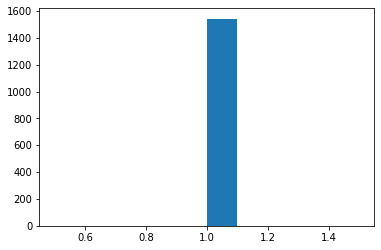

In [ ]:
plt.hist(fr)

(array([  0.,   0.,   0.,   0.,   0., 114.,   0.,   0.,   0.,   0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5],
       dtype=float32),
 <a list of 10 Patch objects>)

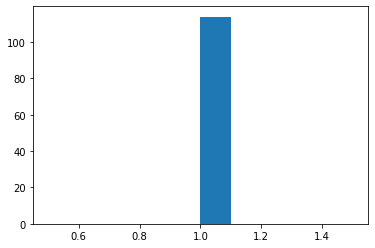

In [ ]:
plt.hist(sr)

In [ ]:
# fig, ax = plt.subplots(figsize = (12,6))

# # dax = ax.plot(prop_confident, acc_vals, '--k')
# cax = ax.scatter(prop_confident_all, acc_vals_2, c = ab, s = 70, cmap = plt.cm.get_cmap('winter_r', 6))
# ax.set_title('Accuracy vs Proportion recognized for different cutoff values (Full Sample)')
# ax.set_xlabel('Proportion Recognized (Full Sample)')
# ax.set_ylabel('Accuracy on Recognized Galaxies')

# # Add colorbar, make sure to specify tick locations to match desired ticklabels
# cbar = fig.colorbar(cax, ticks=[0.53, 0.60, 0.67,0.73, 0.80,0.87])
# cbar.ax.set_yticklabels(['>50%', '>60%', '>70%', '>75%', '>80%', '>90%'])  # vertically oriented colorbar
# cbar.set_label('Confidence of CNN', rotation = 270, labelpad= 15)
# plt.tight_layout()
# plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize = (12,6))

# # dax = ax.plot(prop_confident, acc_vals, '--k')
# cax = ax.scatter(prop_confident, acc_vals, c = a, s = 70, cmap = plt.cm.get_cmap('winter_r', 6))
# ax.set_title('Accuracy vs Proportion recognized for different cutoff values')
# ax.set_xlabel('Proportion Recognized')
# ax.set_ylabel('Accuracy on Recognized Galaxies')

# # Add colorbar, make sure to specify tick locations to match desired ticklabels
# cbar = fig.colorbar(cax, ticks=[0.53, 0.60, 0.67,0.73, 0.80,0.87])
# cbar.ax.set_yticklabels(['>50%', '>60%', '>70%', '>75%', '>80%', '>90%'])  # vertically oriented colorbar
# cbar.set_label('Confidence of CNN', rotation = 270, labelpad= 15)
# plt.tight_layout()
# plt.show()

In [ ]:
# ## First 5 data points
# for i in range(0,5):
#   idx = index_vals[i]
#   # label = y[idx]
#   catid = CATID_4[i]

#   fig, axs = plt.subplots(1, 2, figsize = (10, 5))
#   fig.suptitle('CATID: ' + str(catid))

#   vmap = X_unlabelled[idx, :, :, 0]
#   rotvmap = np.rot90(np.flip(vmap, axis = 1), k = 2)

#   dmap = X_unlabelled[idx, :, :, 1]
#   rotdmap = np.rot90(np.flip(dmap, axis = 1), k = 2)

#   a = axs[0].imshow(rotvmap, cmap='RdYlBu_r')
#   axs[0].set_title('Velocity Map')
#   fig.colorbar(a, ax=axs[0], fraction=0.046, pad=0.04)

#   b = axs[1].imshow(rotdmap, cmap='YlOrRd')
#   axs[1].set_title('Dispersion Map')
#   fig.colorbar(b, ax=axs[1], fraction=0.046, pad=0.04)
#   plt.show()

In [ ]:
ellips = np.linspace(0,0.4,100)
ellips2 = np.linspace(0,0.43,100)
a = 0.08 + ellips/4
bbb = 0.12 + ellips2/4

In [ ]:
a

array([0.08      , 0.0810101 , 0.0820202 , 0.0830303 , 0.0840404 ,
       0.08505051, 0.08606061, 0.08707071, 0.08808081, 0.08909091,
       0.09010101, 0.09111111, 0.09212121, 0.09313131, 0.09414141,
       0.09515152, 0.09616162, 0.09717172, 0.09818182, 0.09919192,
       0.10020202, 0.10121212, 0.10222222, 0.10323232, 0.10424242,
       0.10525253, 0.10626263, 0.10727273, 0.10828283, 0.10929293,
       0.11030303, 0.11131313, 0.11232323, 0.11333333, 0.11434343,
       0.11535354, 0.11636364, 0.11737374, 0.11838384, 0.11939394,
       0.12040404, 0.12141414, 0.12242424, 0.12343434, 0.12444444,
       0.12545455, 0.12646465, 0.12747475, 0.12848485, 0.12949495,
       0.13050505, 0.13151515, 0.13252525, 0.13353535, 0.13454545,
       0.13555556, 0.13656566, 0.13757576, 0.13858586, 0.13959596,
       0.14060606, 0.14161616, 0.14262626, 0.14363636, 0.14464646,
       0.14565657, 0.14666667, 0.14767677, 0.14868687, 0.14969697,
       0.15070707, 0.15171717, 0.15272727, 0.15373737, 0.15474

In [ ]:
a

array([0.08])

NameError: ignored

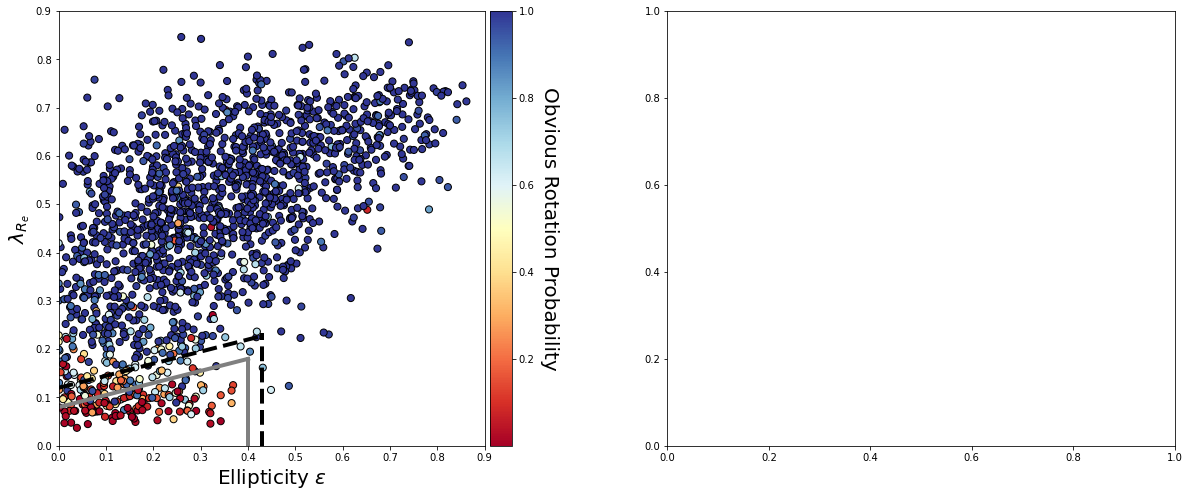

In [ ]:
# sns.set_theme()
import matplotlib
# matplotlib.rc_file_defaults()
labels = ['BCNN_NOR', 'BCNN_OR', 'UNKNOWN']

fig, axs = plt.subplots(1,2,figsize = (20, 8))


Z = axs[0].scatter(ellip, lambda_r, c = sig_OR_prob, edgecolors='k', cmap = 'RdYlBu', s = 50)
axs[0].plot(ellips,a, c = 'grey', linewidth = 4)
axs[0].plot(ellips2,bbb, c = 'k',ls = '--', linewidth = 4)
axs[0].axvline(0.4, c = 'grey', ymin = 0, ymax = 0.20, linewidth = 4)
axs[0].axvline(0.43, c = 'k', ls = '--' ,ymin = 0, ymax = 0.26, linewidth = 4)
axs[0].set_xlabel(r'Ellipticity $\varepsilon$', fontsize = 20)
axs[0].set_ylabel(r'$\lambda_{R_e}$', fontsize = 20)
axs[0].set_ylim(0, 0.9)
axs[0].set_xlim(0, 0.9)
# ax.set_facecolor('xkcd:light grey')
# plt.title('Redshift vs Log Mass', fontsize = 24)

# This function formatter will replace integers with target names
# formatter = plt.FuncFormatter(lambda val, loc: labels[val])

# We must be sure to specify the ticks matching our target names


cbar = plt.colorbar(Z, ax = axs[0], pad = 0.01)

cbar.set_label('Obvious Rotation Probability', rotation=270, fontsize = 20, labelpad = 25)
# plt.tight_layout()

b = axs[1].scatter(fprs,tprs, c= lambs, cmap = 'RdYlBu', edgecolors = 'k', s =ss)
# axs[1].colorbar()
axs[1].set_ylim(0,1.01)
axs[1].set_xlim(-0.01,1)
axs[1].set_xlabel('False Positive Rate [%]')
axs[1].set_ylabel('True Positive Rate [%]')
cbar2 = plt.colorbar(b, ax = axs[1], pad = 0.01)
cbar2.set_label(r'$\lambda_{R_e}$', rotation=0, fontsize = 20, labelpad = 15)


plt.show()

In [ ]:
a[10]
a[0:20]
fprs[0:20]
tprs[0:20]

array([0.        , 0.        , 0.        , 0.        , 0.00694444,
       0.04166667, 0.09027778, 0.16666667, 0.33333333, 0.45833333,
       0.54166667, 0.63888889, 0.68055556, 0.77083333, 0.8125    ,
       0.85416667, 0.89583333, 0.91666667, 0.93055556, 0.93055556])

In [ ]:
cat_NOR[np.where(lambda_r_NOR > 0.3)]

CATID,CATID_EXT,SAMI_FILENAME,OBS_DATE,RA,DEC,LMSTAR,Z_SPEC,Z_TONRY,GMINUSI,MU_AT_RE,GAL_FLAG,HWHM_PSF,RE,RE_CIRC_KPC,ELLIP,N_SERSIC,MTYPE,KIN_MTYPE,ENV_DIST_TO_5NN,ENV_SURFDENS,E_ENV_SURFDENS,SAMI_ISO,SAMI_CENTRAL,SAMI_SAT,HALOMASS,HALOMASS_UNIQUE,GROUP_ID,HALOMASS_WEIGHT,PA_PHOT,PA_STELKIN,E_PA_STELKIN,PA_GASKIN,E_PA_GASKIN,RMAX_VSIGMA,SIGMA_RE,E_SIGMA_RE,VRMS_RE,E_VRMS_RE,APER_CORR_FLAG,RMAX_APER_CORR,LAMBDAR_RE,E_LAMBDAR_RE,LAMBDAR_MAX,E_LAMBDAR_MAX,LAMBDAR_RE_EO,E_LAMBDAR_RE_EO,VSIGMA_RE,E_VSIGMA_RE,VSIGMA_MAX,EVSIGMA_MAX,VSIGMA_RE_EO,E_VSIGMA_RE_EO,MEAN_K51_RE,E_MEAN_K51_RE,FR_EE11,SR_EE11,FR_MC16,SR_MC16,FR_JVDS20,SR_JVDS20,PFR_JVDS20,PSR_JVDS20,INTRINSIC_ELLIP,INCLINATION,LR_SEEING_CORRECTION,VS_SEEING_CORRECTION,HIGH_ORDER_CLASS,SIGMA_CLASS,SIGMA_OR_PROB,SIGMA_NOR_PROB,NSPAXELS_SNGT20,MEAN_SN,MEDIAN_SN,CIRC_6ARC_MEAN_SN,CIRC_6ARC_MEDIAN_SN,RE_MEAN_SN,RE_MEDIAN_SN,KIN_MEAN_SN,KIN_MEDIAN_SN,NUM_SPAXEL_CNN,SMIN,VMIN,SMAX,VMAX,RMS
int64,int64,bytes69,bytes21,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float32
347571,347571,347571_7_Y15SAR2_P002_09T110_2016_02_08-2016_02_14.fits.gz,2016_02_08-2016_02_14,138.20352,2.208006,10.06,0.05673,0.05784,1.18,22.16,0.0,0.9930481,6.5346804,4.2426662,0.65180415,1.4889,2.5,6.0,1.0,0.749,0.0696,--,--,1.0,15414447842927.193,--,101791.0,1.0,108.47237,94.0,29.916666,113.0,0.16666667,3.2666664,68.454216,5.2214847,--,--,1.0,0.49989688,0.48846406,0.064026766,0.2911477,0.064026766,0.4900801,0.06423859,0.6314404,0.0629514,0.35136396,0.0629514,0.63866556,0.06367171,--,--,1.0,--,1.0,--,1.0,--,1.0,--,0.71621245,77.774185,1.0898612,1.1530778,--,0.0,0.07595539093017578,0.9240446090698242,1.0,3.063226,2.652362,4.54697,4.518795,3.9721432,3.66626,5.199993,5.118013,79.0,0.5907127800252788,-100.0253762419374,125.16534473999421,123.10357010484339,--


In [ ]:
mpl.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 4

(array([ 223.,    0.,    0.,    0.,    0.,  122.,    0.,    0.,    0.,
        2137.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

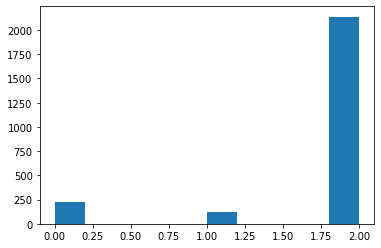

In [ ]:
labels_plot = np.where(label_new == 2.0, 3.0, label_new)
labels_plot = np.where(labels_plot == 1.0, 2.0, labels_plot)
labels_plot = np.where(labels_plot == 3.0, 1.0, labels_plot)

# labels_plot = label_new[np.where(label_new == 2.0, 3.0, label_new)]
# labels_plot = labels_plot[np.where(labels_plot == 1.0, 2.0, labels_plot)]
# labels_plot = labels_plot[np.where(labels_plot == 3.0, 1.0, labels_plot)]


plt.hist(labels_plot)
# plt.hist(label_new)

In [ ]:
art = cat_NOR[np.where(lambda_r_NOR > 0.3)]
babab = np.array(art.field('CATID'))

In [ ]:
babab

array([    229097,     347571, 9008500185, 9011900113, 9239900038,
       9239900567])

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# # for Palatino and other serif fonts use:
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": ["Palatino"],
# )

NameError: ignored

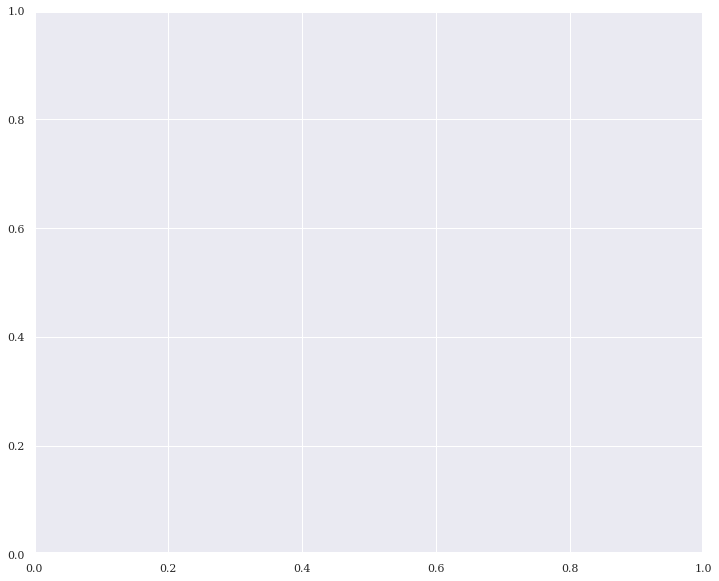

In [ ]:
# sns.set_theme()
# matplotlib.rc_file_defaults()
from mpl_toolkits.axes_grid1 import make_axes_locatable

mpl.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 4

labels = ['NOR', 'OR', 'UNKNOWN']

fig, ax = plt.subplots(figsize = (12, 10))
a = ax.scatter(lmstar, lambda_r, c = labels_plot, edgecolors='grey', cmap = plt.cm.get_cmap('RdYlBu', 3))
ax.set_xlabel(r'$Log(M_{\star}/M_{\odot})}$', fontsize = 20, fontweight = 'bold')
ax.set_ylabel(r'$\lambda_{R_e}$', fontsize = 20, fontweight = 'bold')
# plt.ylim(0, 0.9)
# ax.set_xlim(9.9, 11.7)
# plt.title('SAMI', fontsize = 24,  fontweight = 'bold')

# This function formatter will replace integers with target names
formatter = plt.FuncFormatter(lambda val, loc: labels[val])


divider = make_axes_locatable(ax)
cax = divider.new_vertical(size = '5%', pad = 0.5)
fig.add_axes(cax)
fig.colorbar(a, cax = cax, orientation = 'horizontal', format = formatter, ticks = [0,1,2])

# We must be sure to specify the ticks matching our target names
# fig.colorbar(a,ticks=[0, 1, 2], format=formatter,  orientation="horizontal", pad=0.05);
# plt.tight_layout()
plt.show()

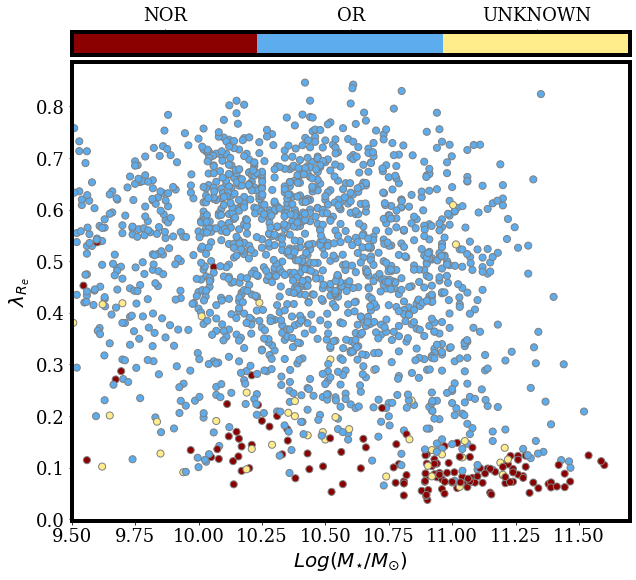

In [ ]:
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib

# Let's design a dummy land use field

# Let's also design our color mapping: 1s should be plotted in blue, 2s in red, etc...
col_dict={0:"#8B0000",
          1:"#5CACEE",
          2:"#FFEC8B"}

# We create a colormar from our list of colors
cm = ListedColormap([col_dict[x] for x in col_dict.keys()])

# Let's also define the description of each category : 1 (blue) is Sea; 2 (red) is burnt, etc... Order should be respected here ! Or using another dict maybe could help.
labels = np.array(["NOR","OR","UNKNOWN"])
len_lab = len(labels)

# prepare normalizer
## Prepare bins for the normalizer
norm_bins = np.sort([*col_dict.keys()]) + 0.5
norm_bins = np.insert(norm_bins, 0, np.min(norm_bins) - 1.0)
# print(norm_bins)
## Make normalizer and formatter
norm = matplotlib.colors.BoundaryNorm(norm_bins, len_lab, clip=True)
fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: labels[norm(x)])

# Plot our figure
fig,ax = plt.subplots( figsize = (10,9))

ax.set_xlabel(r'$Log(M_{\star}/M_{\odot})}$', fontsize = 20, fontweight = 'bold')
ax.set_ylabel(r'$\lambda_{R_e}$', fontsize = 20, fontweight = 'bold')
ax.set_xlim(9.5,11.7)

im = ax.scatter(lmstar, lambda_r, c = label_new, edgecolors='grey', cmap = cm, norm = norm, s = 50)
# im = ax.scatter(A, cmap=cm, norm=norm)

divider = make_axes_locatable(ax)
cax = divider.new_vertical(size = '5%', pad = 0.1)
fig.add_axes(cax)

diff = norm_bins[1:] - norm_bins[:-1]
tickz = norm_bins[:-1] + diff / 2
cb = fig.colorbar(im, format=fmt, ticks=tickz, cax = cax, orientation = 'horizontal')

cax.xaxis.set_ticks_position('top')
ticks = np.linspace(0,1,20)


# ax[1].set_xlabel(r'$\varepsilon$', fontsize = 20, fontweight = 'bold')
# ax[1].set_ylabel(r'$\lambda_{R_e}$', fontsize = 20, fontweight = 'bold')

# im = ax[1].scatter(ellip, lambda_r, c = label_new, edgecolors='grey', cmap = cm, norm = norm, s = 50)

# divider = make_axes_locatable(ax[1])
# cax = divider.new_vertical(size = '5%', pad = 0.1)
# fig.add_axes(cax)

# diff = norm_bins[1:] - norm_bins[:-1]
# tickz = norm_bins[:-1] + diff / 2
# cb = fig.colorbar(im, format=fmt, ticks=tickz, cax = cax, orientation = 'horizontal')

# cax.xaxis.set_ticks_position('top')
# ticks = np.linspace(0,1,20)
# ax.yaxis.set_ticks(ticks = ticks)
# ax.yaxis.set_ticks_position('top')

# Make a plot with major ticks that are multiples of 20 and minor ticks that
# are multiples of 5.  Label major ticks with '.0f' formatting but don't label
# minor ticks.  The string is used directly, the `StrMethodFormatter` is
# created automatically.
# ax.xaxis.set_major_locator(MultipleLocator(20))
# # ax.xaxis.set_major_formatter('{x:.0f}')

# # For the minor ticks, use no labels; default NullFormatter.
# ax.xaxis.set_minor_locator(MultipleLocator(5))


# fig.colorbar(a, cax = cax, orientation = 'horizontal', format = formatter, ticks = [0,1,2])

# fig.savefig("example_landuse.png")
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib

# Let's design a dummy land use field

# Let's also design our color mapping: 1s should be plotted in blue, 2s in red, etc...
col_dict={0:"#8B0000",
          1:"#5CACEE",
          2:"#FFEC8B"}

# We create a colormar from our list of colors
cm = ListedColormap([col_dict[x] for x in col_dict.keys()])

# Let's also define the description of each category : 1 (blue) is Sea; 2 (red) is burnt, etc... Order should be respected here ! Or using another dict maybe could help.
labels = np.array(["NOR","OR","UNKNOWN"])
len_lab = len(labels)

# prepare normalizer
## Prepare bins for the normalizer
norm_bins = np.sort([*col_dict.keys()]) + 0.5
norm_bins = np.insert(norm_bins, 0, np.min(norm_bins) - 1.0)
# print(norm_bins)
## Make normalizer and formatter
norm = matplotlib.colors.BoundaryNorm(norm_bins, len_lab, clip=True)
fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: labels[norm(x)])

# Plot our figure
fig,ax = plt.subplots(figsize = (10,10))

ax.set_xlabel(r'$Log(M_{\star}/M_{\odot})}$', fontsize = 20, fontweight = 'bold')
ax.set_ylabel(r'$\lambda_{R_e}$', fontsize = 20, fontweight = 'bold')

im = ax.scatter(lmstar, lambda_r, c = label_new, edgecolors='grey', cmap = cm, norm = norm, s = 50)
# im = ax.scatter(A, cmap=cm, norm=norm)

divider = make_axes_locatable(ax)
cax = divider.new_vertical(size = '5%', pad = 0.1)
fig.add_axes(cax)

diff = norm_bins[1:] - norm_bins[:-1]
tickz = norm_bins[:-1] + diff / 2
cb = fig.colorbar(im, format=fmt, ticks=tickz, cax = cax, orientation = 'horizontal')

cax.xaxis.set_ticks_position('top')
ticks = np.linspace(0,1,20)
# ax.yaxis.set_ticks(ticks = ticks)
# ax.yaxis.set_ticks_position('top')

# Make a plot with major ticks that are multiples of 20 and minor ticks that
# are multiples of 5.  Label major ticks with '.0f' formatting but don't label
# minor ticks.  The string is used directly, the `StrMethodFormatter` is
# created automatically.
# ax.xaxis.set_major_locator(MultipleLocator(20))
# # ax.xaxis.set_major_formatter('{x:.0f}')

# # For the minor ticks, use no labels; default NullFormatter.
# ax.xaxis.set_minor_locator(MultipleLocator(5))


# fig.colorbar(a, cax = cax, orientation = 'horizontal', format = formatter, ticks = [0,1,2])

# fig.savefig("example_landuse.png")
plt.show()

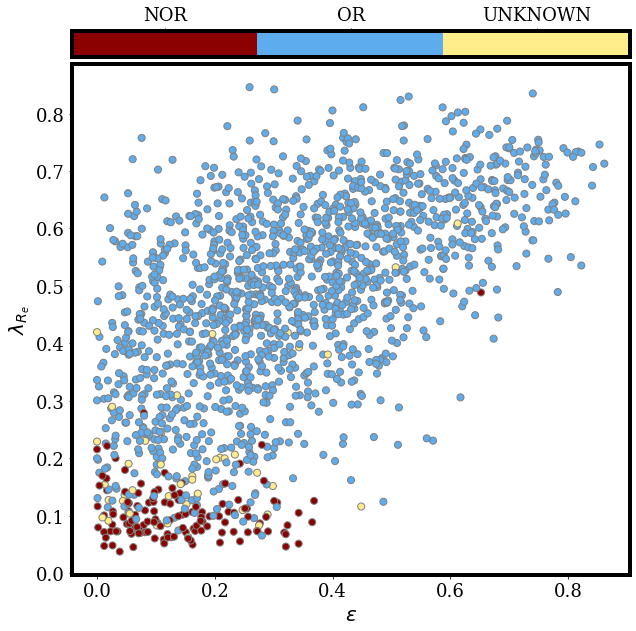

In [ ]:
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib

# Let's design a dummy land use field

# Let's also design our color mapping: 1s should be plotted in blue, 2s in red, etc...
col_dict={0:"#8B0000",
          1:"#5CACEE",
          2:"#FFEC8B"}

# We create a colormar from our list of colors
cm = ListedColormap([col_dict[x] for x in col_dict.keys()])

# Let's also define the description of each category : 1 (blue) is Sea; 2 (red) is burnt, etc... Order should be respected here ! Or using another dict maybe could help.
labels = np.array(["NOR","OR","UNKNOWN"])
len_lab = len(labels)

# prepare normalizer
## Prepare bins for the normalizer
norm_bins = np.sort([*col_dict.keys()]) + 0.5
norm_bins = np.insert(norm_bins, 0, np.min(norm_bins) - 1.0)
# print(norm_bins)
## Make normalizer and formatter
norm = matplotlib.colors.BoundaryNorm(norm_bins, len_lab, clip=True)
fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: labels[norm(x)])

# Plot our figure
fig,ax = plt.subplots(figsize = (10,10))

ax.set_xlabel(r'$\varepsilon$', fontsize = 20, fontweight = 'bold')
ax.set_ylabel(r'$\lambda_{R_e}$', fontsize = 20, fontweight = 'bold')

im = ax.scatter(ellip, lambda_r, c = label_new, edgecolors='grey', cmap = cm, norm = norm, s = 50)
# im = ax.scatter(A, cmap=cm, norm=norm)

divider = make_axes_locatable(ax)
cax = divider.new_vertical(size = '5%', pad = 0.1)
fig.add_axes(cax)

diff = norm_bins[1:] - norm_bins[:-1]
tickz = norm_bins[:-1] + diff / 2
cb = fig.colorbar(im, format=fmt, ticks=tickz, cax = cax, orientation = 'horizontal')

cax.xaxis.set_ticks_position('top')
ticks = np.linspace(0,1,20)
# ax.yaxis.set_ticks(ticks = ticks)
# ax.yaxis.set_ticks_position('top')

# Make a plot with major ticks that are multiples of 20 and minor ticks that
# are multiples of 5.  Label major ticks with '.0f' formatting but don't label
# minor ticks.  The string is used directly, the `StrMethodFormatter` is
# created automatically.
# ax.xaxis.set_major_locator(MultipleLocator(20))
# # ax.xaxis.set_major_formatter('{x:.0f}')

# # For the minor ticks, use no labels; default NullFormatter.
# ax.xaxis.set_minor_locator(MultipleLocator(5))


# fig.colorbar(a, cax = cax, orientation = 'horizontal', format = formatter, ticks = [0,1,2])

# fig.savefig("example_landuse.png")
plt.show()

In [ ]:
cat_NOR_2 = cat_NOR[np.where(cat_NOR.field('LAMBDAR_RE') > 0.3)]

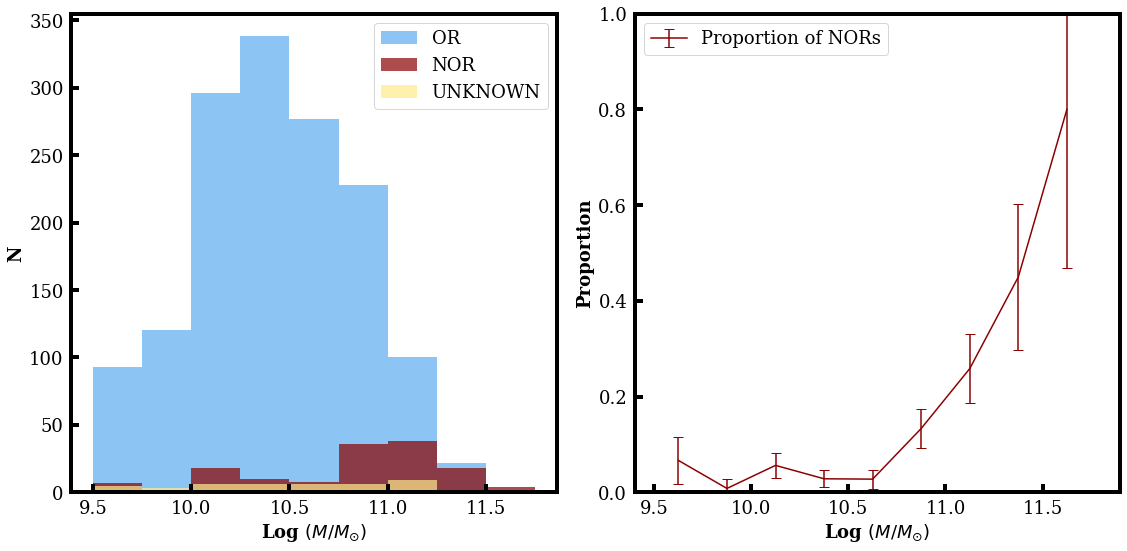

In [ ]:
# sns.set_theme()
col_dict={0:"#8B0000",
          1:"#5CACEE",
          2:"#FFEC8B"}

fig, axs = plt.subplots(1,2, figsize = (16,8))
bins = np.arange(9.5, 12, .25)
counts, bins, bars = axs[0].hist(lmstar_OR, alpha = 0.7, bins = bins, label = 'OR', color = "#5CACEE")
counts1, bins1, bars1 = axs[0].hist(lmstar_NOR, alpha = 0.7, bins = bins, label = 'NOR', color = "#8B0000")
counts2, bins2, bars2 = axs[0].hist(lmstar_UNKNOWN, alpha = 0.7, bins = bins, label = 'UNKNOWN', color = "#FFEC8B")

axs[0].legend()
# axs[0].set_title('Mass Distribution (SAMI)', fontsize = 20)
axs[0].set_xlabel('Log $(M/M_{\odot})})$', fontsize = 18, fontweight = 'bold')
axs[0].set_ylabel('N', fontsize = 18, fontweight = 'bold')
axs[0].tick_params(direction='in', length=8, width=4, colors='k',
               grid_color='k', grid_alpha=0.5)
axs[0].tick_params(axis='both', which='major', pad=7.5)
# axs[0].set_xscale('log')

import scipy.stats.distributions as dist

error = []
n_vals = []
k_vals = []
prop_vals = []
for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals.append(n)

  k = counts1[i]
  k_vals.append(k)
  
  prop = counts1[i]/n
  prop_vals.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error.append(p_upper-p_lower)

error = np.array(error)

#Second error plot

error_2 = []
n_vals_2 = []
k_vals_2 = []
prop_vals_2 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i]
  n_vals_2.append(n)

  k = counts1[i]
  k_vals_2.append(k)
  
  prop = counts1[i]/n
  prop_vals_2.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_2.append(p_upper-p_lower)


error_2 = np.array(error_2)


bins_2 = bins[:-1]
lolims = np.zeros(np.size(counts))

bins_22 = np.arange(9.5, 11.75, .5)
axs[1].errorbar(bins_2 + 0.125, prop_vals, yerr = error, capsize=5, lolims = lolims, c = '#8B0000', label = 'Proportion of NORs')
# axs[1].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of Classified')
axs[1].legend()
axs[1].set_xticks(ticks = bins_22)
# axs[1].set_xscale('log')
# axs[1].set_title('Proportion of NORs - Mass', fontsize = 20)
axs[1].set_ylabel('Proportion', fontsize = 18, fontweight = 'bold')
axs[1].set_xlabel('Log $(M/M_{\odot})}$', fontsize = 18, fontweight = 'bold')
axs[1].set_ylim(0, 1)
axs[1].set_xlim(9.4, 11.9)
axs[1].tick_params(direction='in', length=8, width=4, colors='k',
               grid_color='k', grid_alpha=0.5)
axs[1].tick_params(axis='both', which='major', pad=7.5)

plt.tight_layout()
plt.show()

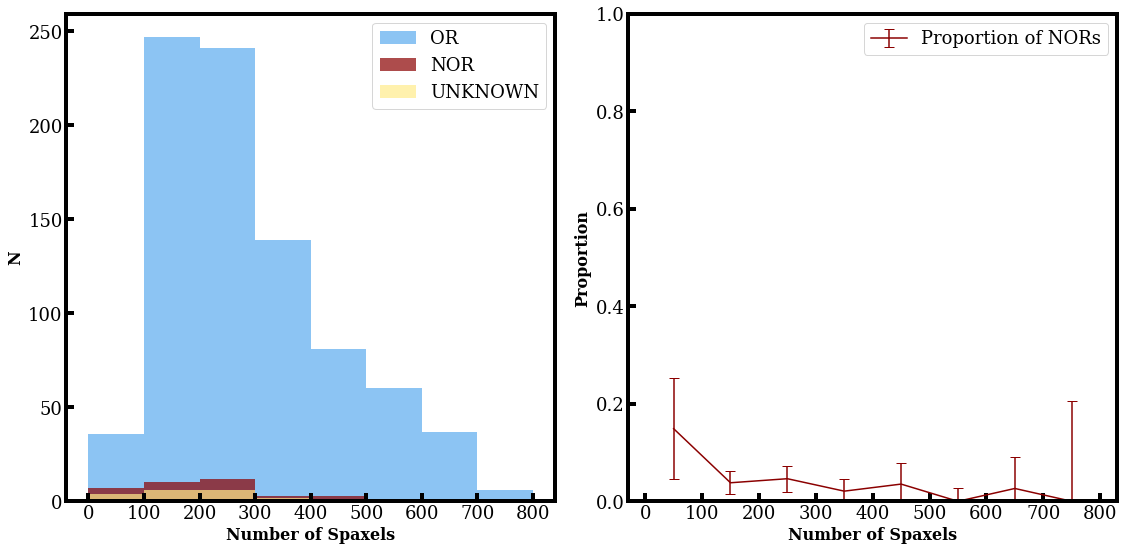

In [ ]:
# sns.set_theme()
col_dict={0:"#8B0000",
          1:"#5CACEE",
          2:"#FFEC8B"}

fig, axs = plt.subplots(1,2, figsize = (16,8))
bins = np.arange(0, 900, 100)
counts, bins, bars = axs[0].hist(num_spaxels_OR, alpha = 0.7, bins = bins, label = 'OR', color = "#5CACEE")
counts1, bins1, bars1 = axs[0].hist(num_spaxels_NOR, alpha = 0.7, bins = bins, label = 'NOR', color = "#8B0000")
counts2, bins2, bars2 = axs[0].hist(num_spaxels_UNKNOWN, alpha = 0.7, bins = bins, label = 'UNKNOWN', color = "#FFEC8B")

axs[0].legend()
# axs[0].set_title('Mass Distribution (SAMI)', fontsize = 20)
axs[0].set_xlabel('Number of Spaxels', fontsize = 16, fontweight = 'bold')
axs[0].set_ylabel('N', fontsize = 16, fontweight = 'bold')
axs[0].tick_params(direction='in', length=8, width=4, colors='k',
               grid_color='k', grid_alpha=0.5)
# axs[0].set_xscale('log')

import scipy.stats.distributions as dist

error = []
n_vals = []
k_vals = []
prop_vals = []
for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals.append(n)

  k = counts1[i]
  k_vals.append(k)
  
  prop = counts1[i]/n
  prop_vals.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error.append(p_upper-p_lower)

error = np.array(error)

#Second error plot

error_2 = []
n_vals_2 = []
k_vals_2 = []
prop_vals_2 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i]
  n_vals_2.append(n)

  k = counts1[i]
  k_vals_2.append(k)
  
  prop = counts1[i]/n
  prop_vals_2.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_2.append(p_upper-p_lower)


error_2 = np.array(error_2)


bins_2 = bins[:-1]
lolims = np.zeros(np.size(counts))

axs[1].errorbar(bins_2+ 50, prop_vals, yerr = error, capsize=5, lolims = lolims, c = '#8B0000', label = 'Proportion of NORs')
# axs[1].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of Classified')
axs[1].legend()
# axs[1].set_xscale('log')
# axs[1].set_title('Proportion of NORs - Mass', fontsize = 20)
axs[1].set_ylabel('Proportion', fontsize = 16, fontweight = 'bold')
axs[1].set_xlabel('Number of Spaxels', fontsize = 16, fontweight = 'bold')
axs[1].set_ylim(0, 1)
axs[1].set_xlim(-30, 830)
axs[1].tick_params(direction='in', length=8, width=4, colors='k',
               grid_color='k', grid_alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
error

array([0.01997667, 0.0139339 , 0.02495722, 0.01798858, 0.01970963,
       0.04122818, 0.07153131, 0.15272728, 0.33089211])

In [ ]:
prop_vals

[0.0,
 0.0,
 0.050793650793650794,
 0.02824858757062147,
 0.027491408934707903,
 0.13333333333333333,
 0.2585034013605442,
 0.45,
 0.8]

Here we see that we need to perform mass cutoff at 10.5 to check whether there is a real effect at low mass

In [ ]:
cat = cat[lmstar < 10.5]

cat_OR  = cat_OR[lmstar_OR < 10.5]

cat_NOR  = cat_NOR[lmstar_NOR < 10.5]

cat_UNKNOWN  = cat_UNKNOWN[lmstar_UNKNOWN < 10.5]

In [ ]:
np.size(cat)

2514

In [ ]:
lambda_r = cat.field('LAMBDAR_RE')
catid = cat.field('CATID')
ellip = cat.field('ELLIP')
lmstar = cat.field('LMSTAR')
re_circ_kpc = cat.field('RE_CIRC_KPC')
sigma_class = cat.field('SIGMA_CLASS')
sig_OR_prob = cat.field('SIGMA_OR_PROB')
sig_NOR_prob = cat.field('SIGMA_NOR_PROB')
kin_mtype = cat.field('KIN_MTYPE')
num_spaxels = cat.field('NUM_SPAXEL_CNN')
maximum_radius = cat.field('RMAX_VSIGMA')
radius = cat.field('RE')
snr = cat.field('RE_MEAN_SN')
label_new = cat.field('LABEL_NEW')

lambda_r_OR = cat_OR.field('LAMBDAR_RE')
catid_OR = cat_OR.field('CATID')
ellip_OR = cat_OR.field('ELLIP')
lmstar_OR = cat_OR.field('LMSTAR')
re_circ_kpc_OR = cat_OR.field('RE_CIRC_KPC')
sigma_class_OR = cat_OR.field('SIGMA_CLASS')
sig_OR_prob_OR = cat_OR.field('SIGMA_OR_PROB')
sig_NOR_prob_OR = cat_OR.field('SIGMA_NOR_PROB')
kin_mtype_OR = cat_OR.field('KIN_MTYPE')
num_spaxels_OR = cat_OR.field('NUM_SPAXEL_CNN')
maximum_radius_OR = cat_OR.field('RMAX_VSIGMA')
radius_OR = cat_OR.field('RE')
snr_OR = cat_OR.field('RE_MEAN_SN')
label_new_OR = cat_OR.field('LABEL_NEW')

lambda_r_NOR = cat_NOR.field('LAMBDAR_RE')
catid_NOR = cat_NOR.field('CATID')
ellip_NOR = cat_NOR.field('ELLIP')
lmstar_NOR = cat_NOR.field('LMSTAR')
re_circ_kpc_NOR = cat_NOR.field('RE_CIRC_KPC')
sigma_class_NOR = cat_NOR.field('SIGMA_CLASS')
sig_OR_prob_NOR = cat_NOR.field('SIGMA_OR_PROB')
sig_NOR_prob_NOR = cat_NOR.field('SIGMA_NOR_PROB')
kin_mtype_NOR = cat_NOR.field('KIN_MTYPE')
num_spaxels_NOR = cat_NOR.field('NUM_SPAXEL_CNN')
maximum_radius_NOR = cat_NOR.field('RMAX_VSIGMA')
radius_NOR = cat_NOR.field('RE')
snr_NOR = cat_NOR.field('RE_MEAN_SN')
label_new_NOR = cat_NOR.field('LABEL_NEW')

lambda_r_UNKNOWN = cat_UNKNOWN.field('LAMBDAR_RE')
catid_UNKNOWN = cat_UNKNOWN.field('CATID')
ellip_UNKNOWN = cat_UNKNOWN.field('ELLIP')
lmstar_UNKNOWN = cat_UNKNOWN.field('LMSTAR')
re_circ_kpc_UNKNOWN = cat_UNKNOWN.field('RE_CIRC_KPC')
sigma_class_UNKNOWN = cat_UNKNOWN.field('SIGMA_CLASS')
sig_OR_prob_UNKNOWN = cat_UNKNOWN.field('SIGMA_OR_PROB')
sig_NOR_prob_UNKNOWN = cat_UNKNOWN.field('SIGMA_NOR_PROB')
kin_mtype_UNKNOWN = cat_UNKNOWN.field('KIN_MTYPE')
num_spaxels_UNKNOWN = cat_UNKNOWN.field('NUM_SPAXEL_CNN')
maximum_radius_UNKNOWN = cat_UNKNOWN.field('RMAX_VSIGMA')
radius_UNKNOWN = cat_UNKNOWN.field('RE')
snr_UNKNOWN = cat_UNKNOWN.field('RE_MEAN_SN')
label_new_UNKNOWN = cat_UNKNOWN.field('LABEL_NEW')

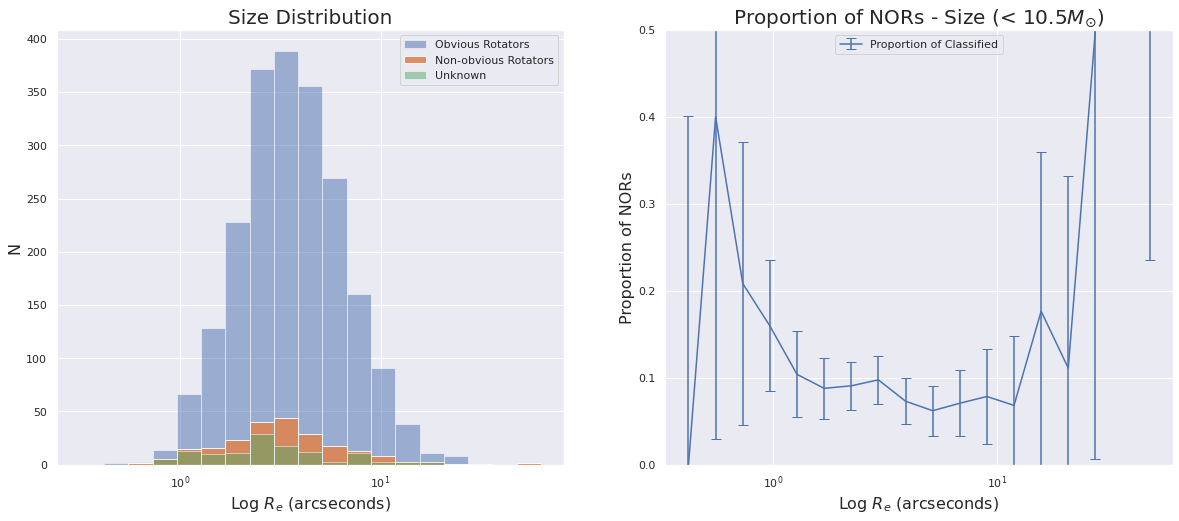

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (20,8))
bins = np.logspace(-0.5, 1.8, 20)
counts, bins, bars = axs[0].hist(radius_OR, alpha = 0.5, bins = bins, label = 'Obvious Rotators')
counts1, bins1, bars1 = axs[0].hist(radius_NOR, alpha = 0.9, bins = bins, label = 'Non-obvious Rotators')
counts2, bins2, bars2 = axs[0].hist(radius_UNKNOWN, alpha = 0.5, bins = bins, label = 'Unknown')

axs[0].legend()
axs[0].set_title('Size Distribution', fontsize = 20)
axs[0].set_xlabel('Log $R_e$ (arcseconds)', fontsize = 16)
axs[0].set_ylabel('N', fontsize = 16)
axs[0].set_xscale('log')

error = []
n_vals = []
k_vals = []
prop_vals = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals.append(n)

  k = counts[i]
  k_vals.append(k)
  
  prop = counts[i]/n
  prop_vals.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error.append(p_upper-p_lower)


error = np.array(error)

#Second error plot

error_2 = []
n_vals_2 = []
k_vals_2 = []
prop_vals_2 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals_2.append(n)

  k = counts1[i]
  k_vals_2.append(k)
  
  prop = counts1[i]/n
  prop_vals_2.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_2.append(p_upper-p_lower)


error_2 = np.array(error_2)

error_3 = []
n_vals_3 = []
k_vals_3 = []
prop_vals_3 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i]
  n_vals_3.append(n)

  k = counts[i]
  k_vals_3.append(k)
  
  prop = counts[i]/n
  prop_vals_3.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_3.append(p_upper-p_lower)


error_3 = np.array(error_3)

bins_2 = bins[:-1]
lolims = np.zeros(19)

# axs[1].errorbar(bins_2, prop_vals, yerr = error, ecolor=None, capsize=5, c = 'r', label = 'Proportion of Total')
axs[1].errorbar(bins_2, prop_vals_2, yerr = error_2, ecolor=None, capsize=5, c = 'b', label = 'Proportion of Classified')
axs[1].legend()
axs[1].set_xscale('log')
axs[1].set_title('Proportion of NORs - Size (< 10.5$M_{\odot}$)', fontsize = 20)
axs[1].set_ylabel('Proportion of NORs', fontsize = 16)
axs[1].set_xlabel('Log $R_e$ (arcseconds)', fontsize = 16)
axs[1].set_ylim(0, 0.5)

# axs[2].errorbar(bins_2, prop_vals, yerr = error, capsize=5, c = 'r', label = 'Proportion of Total')
# axs[2].errorbar(bins_2, prop_vals_3, yerr = error_3, capsize=5, lolims = lolims, c = 'k', label = 'Proportion of Classified')
# # axs[2].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of Classified')
# axs[2].legend()
# axs[2].set_xscale('log')
# axs[2].set_title('Proportion of ORs - Size (< 10.5$M_{\odot}$)', fontsize = 20)
# axs[2].set_ylabel('Proportion of ORs', fontsize = 16)
# axs[2].set_xlabel('Log $R_e$ (arcseconds)', fontsize = 16)
# axs[2].set_ylim(0.4, 1)

plt.show()


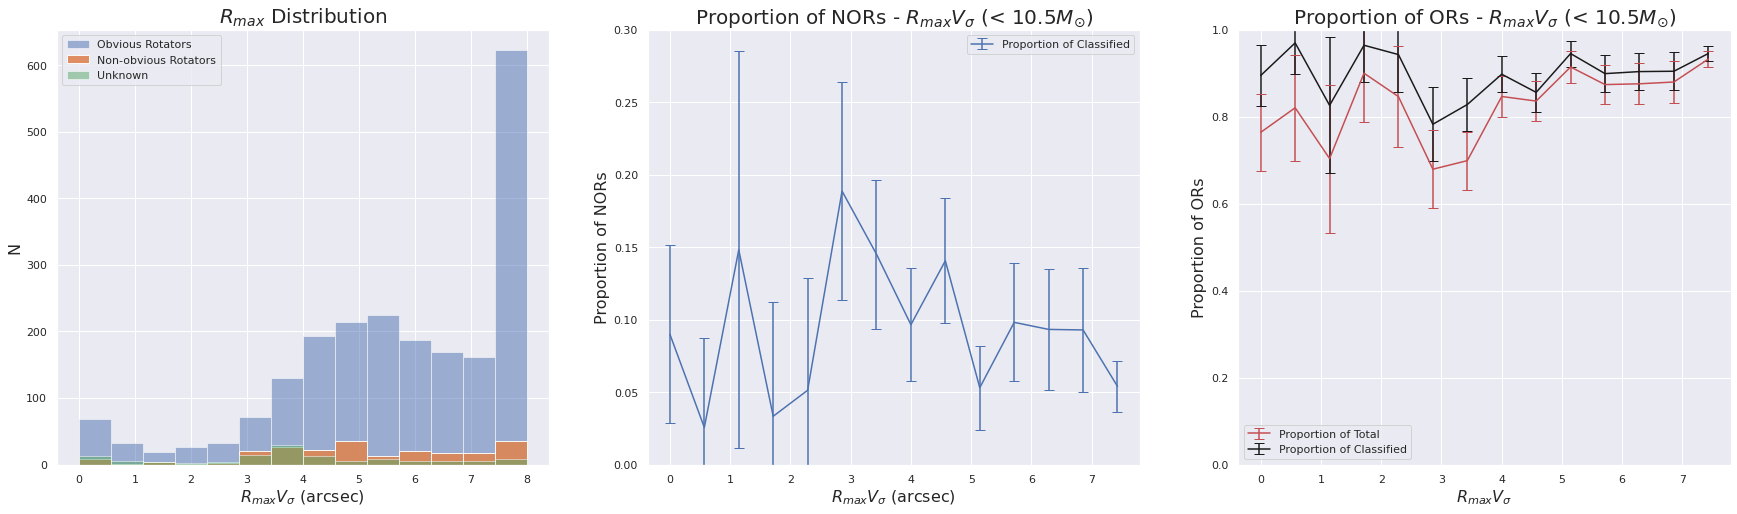

In [ ]:
fig, axs = plt.subplots(1,3, figsize = (30,8))
bins = np.linspace(0,8,15)
counts, bins, bars = axs[0].hist(maximum_radius_OR, alpha = 0.5, bins = bins, label = 'Obvious Rotators')
counts1, bins1, bars1 = axs[0].hist(maximum_radius_NOR, alpha = 0.9, bins = bins, label = 'Non-obvious Rotators')
counts2, bins2, bars2 = axs[0].hist(maximum_radius_UNKNOWN, alpha = 0.5, bins = bins, label = 'Unknown')

axs[0].legend()
axs[0].set_title('$R_{max}$ Distribution', fontsize = 20)
axs[0].set_xlabel('$R_{max} V_{\sigma}$ (arcsec)', fontsize = 16)
axs[0].set_ylabel('N', fontsize = 16)
# axs[0].set_xscale('log')

error = []
n_vals = []
k_vals = []
prop_vals = []
for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals.append(n)

  k = counts[i]
  k_vals.append(k)
  
  prop = counts[i]/n
  prop_vals.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error.append(p_upper-p_lower)

error = np.array(error)

#Second error plot

error_2 = []
n_vals_2 = []
k_vals_2 = []
prop_vals_2 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals_2.append(n)

  k = counts1[i]
  k_vals_2.append(k)
  
  prop = counts1[i]/n
  prop_vals_2.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_2.append(p_upper-p_lower)


error_2 = np.array(error_2)


error_3 = []
n_vals_3 = []
k_vals_3 = []
prop_vals_3 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i]
  n_vals_3.append(n)

  k = counts[i]
  k_vals_3.append(k)
  
  prop = counts[i]/n
  prop_vals_3.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_3.append(p_upper-p_lower)


error_3 = np.array(error_3)


bins_2 = bins[:-1]
lolims = np.zeros(np.size(counts))

# axs[1].errorbar(bins_2, prop_vals, yerr = error, capsize=5, lolims = lolims, c = 'r', label = 'Proportion of Total')
axs[1].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of Classified')
axs[1].legend()
# axs[1].set_xscale('log')
axs[1].set_title('Proportion of NORs - $R_{max}V_{\sigma}$ (< 10.5$M_{\odot}$)', fontsize = 20)
axs[1].set_ylabel('Proportion of NORs', fontsize = 16)
axs[1].set_xlabel('$R_{max} V_{\sigma}$ (arcsec)', fontsize = 16)
axs[1].set_ylim(0, .3)

axs[2].errorbar(bins_2, prop_vals, yerr = error, capsize=5, c = 'r', label = 'Proportion of Total')
axs[2].errorbar(bins_2, prop_vals_3, yerr = error_3, capsize=5, lolims = lolims, c = 'k', label = 'Proportion of Classified')
# axs[2].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of Classified')
axs[2].legend()

axs[2].set_title('Proportion of ORs - $R_{max} V_{\sigma}$ (< 10.5$M_{\odot}$)', fontsize = 20)
axs[2].set_ylabel('Proportion of ORs', fontsize = 16)
axs[2].set_xlabel('$R_{max} V_{\sigma}$', fontsize = 16)
axs[2].set_ylim(0, 1)


plt.show()

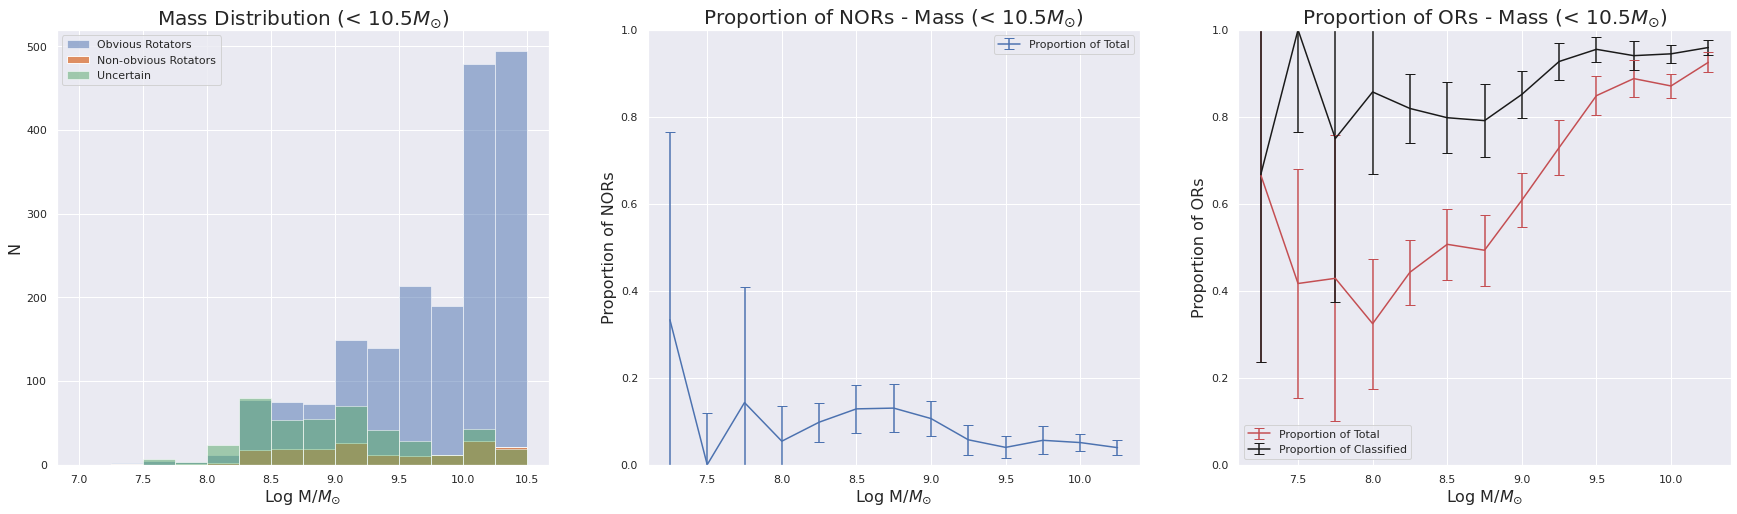

In [ ]:
fig, axs = plt.subplots(1,3, figsize = (30,8))
bins = np.arange(7, 10.75, 0.25)
counts, bins, bars = axs[0].hist(lmstar_OR, alpha = 0.5, bins = bins, label = 'Obvious Rotators')
counts1, bins1, bars1 = axs[0].hist(lmstar_NOR, alpha = 0.9, bins = bins, label = 'Non-obvious Rotators')
counts2, bins2, bars2 = axs[0].hist(lmstar_UNKNOWN, alpha = 0.5, bins = bins, label = 'Uncertain')

axs[0].legend()
axs[0].set_title('Mass Distribution (< 10.5$M_{\odot}$)', fontsize = 20)
axs[0].set_xlabel('Log M/$M_{\odot}}$', fontsize = 16)
axs[0].set_ylabel('N', fontsize = 16)
# axs[0].set_xscale('log')

import scipy.stats.distributions as dist

error = []
n_vals = []
k_vals = []
prop_vals = []
for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals.append(n)

  k = counts[i]
  k_vals.append(k)
  
  prop = counts[i]/n
  prop_vals.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error.append(p_upper-p_lower)

error = np.array(error)

#Second error plot

error_2 = []
n_vals_2 = []
k_vals_2 = []
prop_vals_2 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals_2.append(n)

  k = counts1[i]
  k_vals_2.append(k)
  
  prop = counts1[i]/n
  prop_vals_2.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_2.append(p_upper-p_lower)


error_2 = np.array(error_2)

error_3 = []
n_vals_3 = []
k_vals_3 = []
prop_vals_3 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i]
  n_vals_3.append(n)

  k = counts[i]
  k_vals_3.append(k)
  
  prop = counts[i]/n
  prop_vals_3.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_3.append(p_upper-p_lower)


error_3 = np.array(error_3)


bins_2 = bins[:-1]
lolims = np.zeros(np.size(counts))

# axs[1].errorbar(bins_2, prop_vals, yerr = error, capsize=5, lolims = lolims, c = 'r', label = 'Proportion of Total')
axs[1].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of Total')
axs[1].legend()
# axs[1].set_xscale('log')
axs[1].set_title('Proportion of NORs - Mass (< 10.5$M_{\odot}$)', fontsize = 20)
axs[1].set_ylabel('Proportion of NORs', fontsize = 16)
axs[1].set_xlabel('Log M/$M_{\odot}}$', fontsize = 16)
axs[1].set_ylim(0, 1)

axs[2].errorbar(bins_2, prop_vals, yerr = error, capsize=5, c = 'r', label = 'Proportion of Total')
axs[2].errorbar(bins_2, prop_vals_3, yerr = error_3, capsize=5, lolims = lolims, c = 'k', label = 'Proportion of Classified')
# axs[2].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of Classified')
axs[2].legend()

axs[2].set_title('Proportion of ORs - Mass (< 10.5$M_{\odot}$)', fontsize = 20)
axs[2].set_ylabel('Proportion of ORs', fontsize = 16)
axs[2].set_xlabel('Log M/$M_{\odot}}$', fontsize = 16)
axs[2].set_ylim(0, 1)

plt.show()

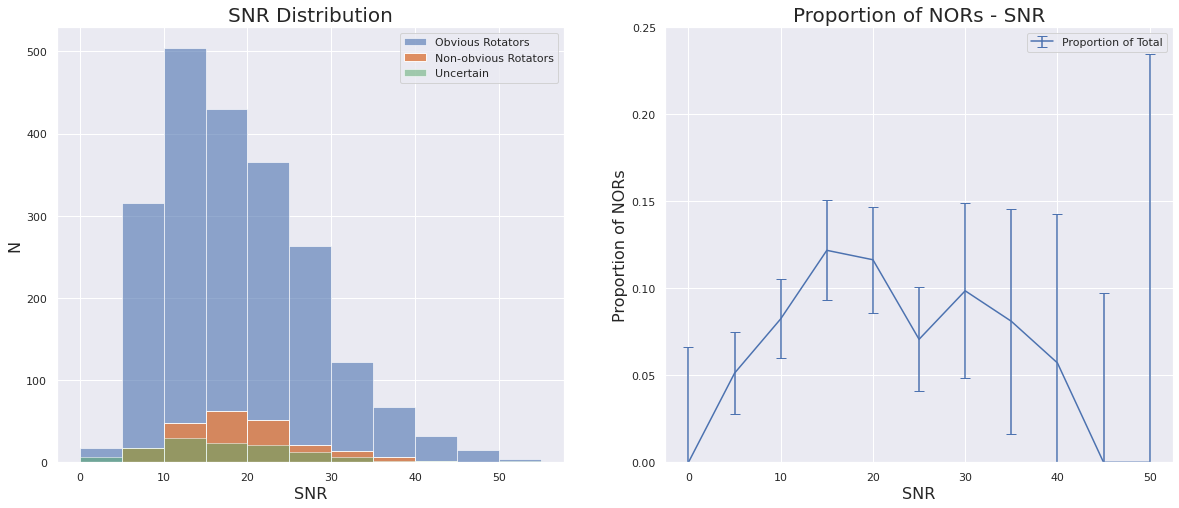

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (20,8))
bins = np.arange(0, 60, 5)
counts, bins, bars = axs[0].hist(snr_OR, alpha = 0.6, bins = bins, label = 'Obvious Rotators')
counts1, bins1, bars1 = axs[0].hist(snr_NOR, alpha = 0.9, bins = bins, label = 'Non-obvious Rotators')
counts2, bins2, bars2 = axs[0].hist(snr_UNKNOWN, alpha = 0.5, bins = bins, label = 'Uncertain')

axs[0].legend()
axs[0].set_title('SNR Distribution', fontsize = 20)
axs[0].set_xlabel('SNR', fontsize = 16)
axs[0].set_ylabel('N', fontsize = 16)
# axs[0].set_xscale('log')

error = []
n_vals = []
k_vals = []
prop_vals = []
for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals.append(n)

  k = counts[i]
  k_vals.append(k)
  
  prop = counts[i]/n
  prop_vals.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error.append(p_upper-p_lower)

error = np.array(error)

#Second error plot

error_2 = []
n_vals_2 = []
k_vals_2 = []
prop_vals_2 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals_2.append(n)

  k = counts1[i]
  k_vals_2.append(k)
  
  prop = counts1[i]/n
  prop_vals_2.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_2.append(p_upper-p_lower)


error_2 = np.array(error_2)

error_3 = []
n_vals_3 = []
k_vals_3 = []
prop_vals_3 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i]
  n_vals_3.append(n)

  k = counts[i]
  k_vals_3.append(k)
  
  prop = counts[i]/n
  prop_vals_3.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_3.append(p_upper-p_lower)


error_3 = np.array(error_3)

bins_2 = bins[:-1]
lolims = np.zeros(np.size(counts))

# axs[1].errorbar(bins_2, prop_vals, yerr = error, capsize=5, lolims = lolims, c = 'r', label = 'Proportion of Total')
axs[1].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of Total')
axs[1].legend()

# axs[1].set_xscale('log')
axs[1].set_title('Proportion of NORs - SNR', fontsize = 20)
axs[1].set_ylabel('Proportion of NORs', fontsize = 16)
axs[1].set_xlabel('SNR', fontsize = 16)
axs[1].set_ylim(0, 0.25)

# axs[2].errorbar(bins_2, prop_vals, yerr = error, capsize=5, c = 'r', label = 'Proportion of Total')
# axs[2].errorbar(bins_2, prop_vals_3, yerr = error_3, capsize=5, lolims = lolims, c = 'k', label = 'Proportion of Classified')
# # axs[2].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of Classified')
# axs[2].legend()

# axs[2].set_title('Proportion of ORs - SNR (< 10.5$M_{\odot}$)', fontsize = 20)
# axs[2].set_ylabel('Proportion of ORs', fontsize = 16)
# axs[2].set_xlabel('SNR', fontsize = 16)
# axs[2].set_ylim(0, 1)

plt.show()

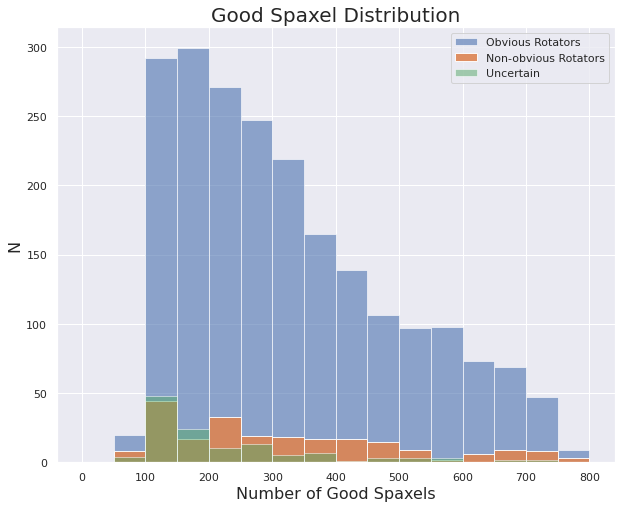

In [ ]:
sns.set_theme()
fig, axs = plt.subplots( figsize = (10,8))
bins = np.arange(0, 850, 50)
counts, bins, bars = axs.hist(num_spaxels_OR, alpha = 0.6, bins = bins, label = 'Obvious Rotators')
counts1, bins1, bars1 = axs.hist(num_spaxels_NOR, alpha = 0.9, bins = bins, label = 'Non-obvious Rotators')
counts2, bins2, bars2 = axs.hist(num_spaxels_UNKNOWN, alpha = 0.5, bins = bins, label = 'Uncertain')

axs.legend()
axs.set_title('Good Spaxel Distribution', fontsize = 20)
axs.set_xlabel('Number of Good Spaxels', fontsize = 16)
axs.set_ylabel('N', fontsize = 16)
# axs.set_xscale('log')

error = []
n_vals = []
k_vals = []
prop_vals = []
for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals.append(n)

  k = counts[i]
  k_vals.append(k)
  
  prop = counts[i]/n
  prop_vals.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error.append(p_upper-p_lower)

error = np.array(error)

#Second error plot

error_2 = []
n_vals_2 = []
k_vals_2 = []
prop_vals_2 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i]
  n_vals_2.append(n)

  k = counts1[i]
  k_vals_2.append(k)
  
  prop = counts1[i]/n
  prop_vals_2.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_2.append(p_upper-p_lower)


error_2 = np.array(error_2)

bins_2 = bins[:-1]
lolims = np.zeros(np.size(counts))


error_3 = []
n_vals_3 = []
k_vals_3 = []
prop_vals_3 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i]
  n_vals_3.append(n)

  k = counts[i]
  k_vals_3.append(k)
  
  prop = counts[i]/n
  prop_vals_3.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_3.append(p_upper-p_lower)


error_3 = np.array(error_3)

# axs[1].errorbar(bins_2, prop_vals_3, yerr = error_3, capsize=5, lolims = lolims, c = 'k', label = 'Proportion of Total')
# axs[1].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of Classified')
# axs[1].legend()

# # axs[1].set_xscale('log')
# axs[1].set_title('Proportion of NORs - Spaxels (< 10.5$M_{\odot}$)', fontsize = 20)
# axs[1].set_ylabel('Proportion of NORs', fontsize = 16)
# axs[1].set_xlabel('Number of Good Spaxels', fontsize = 16)
# axs[1].set_ylim(0, 0.25)

# axs[2].errorbar(bins_2, prop_vals, yerr = error, capsize=5, c = 'r', label = 'Proportion of Total')
# axs[2].errorbar(bins_2, prop_vals_3, yerr = error_3, capsize=5, lolims = lolims, c = 'k', label = 'Proportion of Classified')
# # axs[2].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of Classified')
# axs[2].legend()

# axs[2].set_title('Proportion of ORs - Spaxels (< 10.5$M_{\odot}$)', fontsize = 20)
# axs[2].set_ylabel('Proportion of ORs', fontsize = 16)
# axs[2].set_xlabel('Number of Good Spaxels', fontsize = 16)
# axs[2].set_ylim(0.4, 1)

plt.show()

# SIMULATIONS


In [ ]:
path = '/content/drive/MyDrive/KIN_TRAINING_DATASETS/'

eagle_class = np.load(path + 'eagle_class_240821.npy')
eagle_std = np.load(path + 'eagle_std_240821.npy')
eagle_OR = np.load(path + 'eagle_OR_240821.npy')
eagle_NOR = np.load(path + 'eagle_NOR_240821.npy')
eagle_ID = np.load(path + 'EAGLE_ID_180821.npy')
eagle_numpix = np.load(path + 'EAGLE_numsp_180821.npy')
eagle_m_sol = np.load(path + 'EAGLE_M_SOL.npy')
eagle_m_sol50 = np.load(path + 'EAGLE_M_SOL50.npy')
eagle_r50 = np.load(path + 'EAGLE_R50.npy')
eagle_r50_proj = np.load(path + 'EAGLE_R50_PROJ.npy')
eagle_re_r = np.load(path + 'EAGLE_Z.npy')
eagle_z_proper = np.load(path + 'EAGLE_Z_PROPER.npy')

In [ ]:
print(np.shape(eagle_re_r))

(497,)


Magneticum

In [ ]:
# path = '/content/drive/MyDrive/KIN_TRAINING_DATASETS/'

# mag_class = np.load(path + 'mag_class_040821.npy')
# mag_std = np.load(path + 'mag_std_040821.npy')
# mag_OR = np.load(path + 'mag_OR_040821.npy')
# mag_NOR = np.load(path + 'mag_NOR_040821.npy')
# mag_ID = np.load(path + 'catid_mag_030821.npy')

# # eagle_m_sol = np.load(path + 'EAGLE_M_SOL.npy')
# # eagle_m_sol50 = np.load(path + 'EAGLE_M_SOL50.npy')
# # eagle_r50 = np.load(path + 'EAGLE_R50.npy')
# # eagle_r50_proj = np.load(path + 'EAGLE_R50_PROJ.npy')
# # eagle_re_r = np.load(path + 'EAGLE_Z.npy')
# # eagle_z_proper = np.load(path + 'EAGLE_Z_PROPER.npy')

In [ ]:
path2 = '/content/drive/MyDrive/FITS_FILES/'
cat5 = Table.read(path2 + 'mag_cnn1.fits', format = 'fits')

In [ ]:
cat5[0:5]

MAG_ID,LMSTAR,R_E,ELLIP,LAMBDA_R,MAIN/SUB,CNN_CLASS,CNN_OR_PROB,CNN_NOR_PROB,CNN_STD,CNN_CLASS_FINAL
int32,float64,float64,float64,float64,bytes4,int64,float32,float32,float32,int64
0,12.4631,12.4631,0.252413,0.272619,main,1,0.7569227,0.24307728,0.20616549,1
10053,11.6338,11.6338,0.307363,0.23733,main,0,0.07054046,0.9294596,0.065119684,0
10054,11.1543,11.1543,0.253122,0.165087,sub,1,0.8321117,0.16788834,0.19179058,1
10055,10.5168,10.5168,0.302413,0.0989245,sub,0,0.11741711,0.88258284,0.119527236,0
10056,10.3271,10.3271,0.612865,0.35832,sub,1,0.9975279,0.0024721134,0.012204941,1


In [ ]:
# ID_proper_mag = cat5.field("MAG_ID")
# main_sub_mag = cat5.field('main/sub')
# lmstar_mag = cat5.field('logM*/Msun')
# rad_mag = cat5.field('logM*/Msun')
# lambda_mag = cat5.field('lambdaR_edgeon')
# ellip_mag = cat5.field('ellipticity_edgeon')


In [ ]:
ellip_new = []
lmstar_new = []
rad_new = []
main_sub_new = []
lambda_new = []

for i in range(0, np.size(mag_ID)):
  id_use = mag_ID[i]
  idx = np.where(id_use == ID_proper_mag)[0][0]
  
  lam = lambda_mag[idx]
  ell = ellip_mag[idx]
  lmstar = lmstar_mag[idx]
  main_sub = main_sub_mag[idx]
  rad = rad_mag[idx]

  ellip_new.append(ell)
  lmstar_new.append(lmstar)
  rad_new.append(rad)
  main_sub_new.append(main_sub)
  lambda_new.append(lam)

In [ ]:
mag_ellip = cat5.field('ELLIP')
mag_lambdar = cat5.field('LAMBDA_R')
mag_class = cat5.field("CNN_CLASS_FINAL")
mag_mass = cat5.field("LMSTAR")

In [ ]:
eagle_lmstar = []
eagle_lmstar50 = []
for i in range(0, np.size(eagle_m_sol)):
  lmstar = math.log10(eagle_m_sol[i])
  lmstar50 = math.log10(eagle_m_sol50[i])
  eagle_lmstar.append(lmstar)
  eagle_lmstar50.append(lmstar50)


eagle_lmstar = np.array(eagle_lmstar)
eagle_lmstar50 = np.array(eagle_lmstar50)


In [ ]:
cat2 = Table([eagle_ID, eagle_lmstar,  eagle_lmstar50, eagle_r50, eagle_r50_proj, eagle_re_r, eagle_z_proper , eagle_numpix, eagle_class, eagle_OR, eagle_NOR, eagle_std], 
          names=('EAGLE_ID','LOG_M_SOL', 'LOG_M_SOL50', 'R_50' , 'R50_PROJ' , 'RE_RBAND', 'REDSHIFT' , 'NUM_SPAXEL', 'CNN_CLASS','CNN_OR_PROB', 'CNN_NOR_PROB', 'CNN_STD'))

In [ ]:
cat2

EAGLE_ID,LOG_M_SOL,LOG_M_SOL50,R_50,R50_PROJ,RE_RBAND,REDSHIFT,NUM_SPAXEL,CNN_CLASS,CNN_OR_PROB,CNN_NOR_PROB,CNN_STD
str8,float64,float64,float64,float64,float64,float64,int32,float32,float32,float32,float32
10011808,10.040349964645454,10.031271391403662,7.747652,5.7337537,9.01736,0.039340654065406544,9,1.0,0.74456203,0.25543803,0.1471472
10029006,10.062383227407933,10.058096131497916,7.0445333,5.2260675,14.4014,0.03574059405940594,21,1.0,0.87013733,0.12986264,0.10882157
10030066,10.12559723124186,10.122400871260382,8.135567,6.0756936,12.8995,0.04186069606960696,30,1.0,0.73563147,0.26436853,0.12784222
10056398,10.14301823085451,10.13610371643002,7.579138,5.764641,11.6776,0.03958065806580658,42,1.0,0.7410872,0.25891277,0.14153594
10058549,10.262478556207952,10.246092283608313,8.655582,6.5884633,7.43958,0.04558075807580758,41,1.0,0.99378073,0.0062192464,0.0060692993
10074039,10.157638635063655,10.150291474467764,8.100819,6.005105,8.54886,0.04126068606860686,20,1.0,0.7573802,0.24261978,0.1398397
10113002,10.153045723200758,10.145691421672876,6.587852,5.07722,10.7361,0.03466057605760576,28,1.0,0.88937443,0.110625595,0.080429666
10138698,10.060840099476822,10.055489379579505,6.8277335,5.286772,8.5687,0.036100600060006004,8,1.0,0.81948996,0.1805101,0.113542095
10139494,10.245357695740854,10.241191376917588,8.08589,6.1232595,10.0066,0.04222070207020702,55,1.0,0.7925221,0.20747796,0.12516837


In [ ]:
ellip60 = np.load(path + 'EAGLE_ellip.npy')
lambda60 = np.load(path + 'EAGLE_lambda.npy')
eagle_ID2 = np.load(path + 'EAGLE_ID2.npy')
eagle_ID = np.array(cat2.field('EAGLE_ID'))

In [ ]:
eagle_ID3 = []
for i in range(0, np.size(eagle_ID)):
  val = eagle_ID[i]
  new = int(val)
  eagle_ID3.append(new)
eagle_ID3 = np.array(eagle_ID3)

In [ ]:
type(eagle_ID[0])

numpy.str_

In [ ]:
idxs = []
ellip_24 = []
lambda_24 = []
for i in range(0, np.size(eagle_ID3)):
  id = eagle_ID3[i]
  val = np.where(eagle_ID2 == id)[0]
  if np.size(val) < 1:
    idxs.append(np.NaN)
    ellip_24.append(np.NaN)
    lambda_24.append(np.NaN)
  else:
    val1 = val[0]
    idxs.append(val[0])
    ellip_24.append(ellip60[val1])
    lambda_24.append(lambda60[val1])

ellip_24 = np.array(ellip_24)
lambda_24 = np.array(lambda_24)
idxs = np.array(idxs)

In [ ]:
np.shape(ellip_24)

(497,)

In [ ]:
cat2['LAMBDA_i60'] = lambda_24
cat2['ELLIP_i60'] = ellip_24

In [ ]:
cat2

EAGLE_ID,LOG_M_SOL,LOG_M_SOL50,R_50,R50_PROJ,RE_RBAND,REDSHIFT,NUM_SPAXEL,CNN_CLASS,CNN_OR_PROB,CNN_NOR_PROB,CNN_STD,LAMBDA_i60,ELLIP_i60
str8,float64,float64,float64,float64,float64,float64,int32,float32,float32,float32,float32,float64,float64
10011808,10.040349964645454,10.031271391403662,7.747652,5.7337537,9.01736,0.039340654065406544,9,1.0,0.74456203,0.25543803,0.1471472,0.371752535612617,0.384163058201767
10029006,10.062383227407933,10.058096131497916,7.0445333,5.2260675,14.4014,0.03574059405940594,21,1.0,0.87013733,0.12986264,0.10882157,0.226662185210112,0.45902421711954
10030066,10.12559723124186,10.122400871260382,8.135567,6.0756936,12.8995,0.04186069606960696,30,1.0,0.73563147,0.26436853,0.12784222,0.410208243271709,0.241447009335488
10056398,10.14301823085451,10.13610371643002,7.579138,5.764641,11.6776,0.03958065806580658,42,1.0,0.7410872,0.25891277,0.14153594,0.193871412532402,0.230108876738386
10058549,10.262478556207952,10.246092283608313,8.655582,6.5884633,7.43958,0.04558075807580758,41,1.0,0.99378073,0.0062192464,0.0060692993,0.451755871184203,0.494820042129029
10074039,10.157638635063655,10.150291474467764,8.100819,6.005105,8.54886,0.04126068606860686,20,1.0,0.7573802,0.24261978,0.1398397,0.477734314101225,0.383915751527022
10113002,10.153045723200758,10.145691421672876,6.587852,5.07722,10.7361,0.03466057605760576,28,1.0,0.88937443,0.110625595,0.080429666,0.199338178777467,0.374903994055202
10138698,10.060840099476822,10.055489379579505,6.8277335,5.286772,8.5687,0.036100600060006004,8,1.0,0.81948996,0.1805101,0.113542095,0.477942847173318,0.49911054970045
10139494,10.245357695740854,10.241191376917588,8.08589,6.1232595,10.0066,0.04222070207020702,55,1.0,0.7925221,0.20747796,0.12516837,0.343992024603088,0.327607305696529


In [ ]:
ellip_24 = []
lambda_24 = []
for i in range(0, np.size(idxs)):
  a = idxs[i]
  if a == np.NaN:
    ellip_24.append(np.NaN)

In [ ]:
path2 = '/content/drive/MyDrive/FITS_FILES/'

In [ ]:
rrr = cat2.write(path2 + 'eagle_cnn10.fits', format = 'fits')

In [ ]:
path2 = '/content/drive/MyDrive/FITS_FILES/'
cat4 = Table.read(path2 + 'eagle_cnn10.fits', hdu = 1)

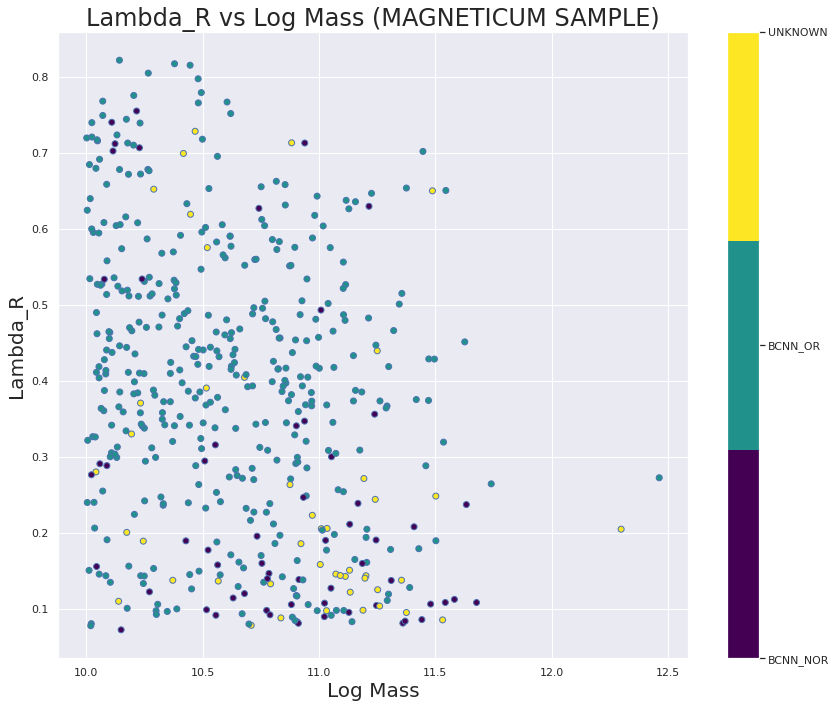

In [ ]:
labels = ['BCNN_NOR', 'BCNN_OR', 'UNKNOWN']
sns.set_theme()

fig, ax = plt.subplots(figsize = (12, 10))
plt.scatter(mag_mass, mag_lambdar, c = mag_class, edgecolors='b', cmap = plt.cm.get_cmap('viridis', 3))
plt.xlabel('Log Mass', fontsize = 20)
plt.ylabel('Lambda_R', fontsize = 20)
plt.title('Lambda_R vs Log Mass (MAGNETICUM SAMPLE)', fontsize = 24)
# plt.ylim(0, 30)
# plt.xlim(0, 10**11)
# ax.set_facecolor('xkcd:light grey')


# This function formatter will replace integers with target names
formatter = plt.FuncFormatter(lambda val, loc: labels[val])

# We must be sure to specify the ticks matching our target names
plt.colorbar(ticks=[0, 1, 2], format=formatter);
plt.tight_layout()
plt.show()

In [ ]:
# file1 = 'SimSpin_EAGLE_observations_snap28_RefL0100N1504.txt'
# cat3 = Table.read(path2 + file1, format  = 'ascii')

In [ ]:
# # lambdar_i90 = cat3['LambdaR_i90']
# lambdar_i60 = cat3['LambdaR_i60']
# # ellip_i90 = cat3['Ellip_i90']
# ellip_i60 = cat3['Ellip_i60']
# pixel_sizes = cat3['PixelSize']
# lmstar60 = cat3['StellarMass_ss_i60']
# numparticles60 = cat3['NumberOfParticles_ss_i60']
# catids = cat3['GalaxyID']


In [ ]:
# lambda_i60_vals = []
# # lambda_i90_vals = []
# ellip_i60_vals = []
# # ellip_i90_vals = []
# pixel_size = []
# num_particlesi60_vals = []
# # catid_test = []
# lmstari60_vals = []

# for i in range(0, np.size(idx_vals)):
#   idx = idx_vals[i]
#   # catid = catids[idx]
#   # catid_test.append(catid)

#   if math.isnan(idx) == True:
#     lambda_i60_vals.append(np.NaN)
#     ellip_i60_vals.append(np.NaN)
#     pixel_size.append(np.NaN)
#     num_particlesi60_vals.append(np.NaN)
#     lmstari60_vals.append(np.NaN)
    
#   else:
#     lambda_60 = lambdar_i60[idx]
#     ellip_60 = ellip_i60[idx]
#     pixel = pixel_sizes[idx]
#     lmstar = lmstar60[idx]
#     num_p = numparticles60[idx]

#     lambda_i60_vals.append(lambda_60)
#     ellip_i60_vals.append(ellip_60)
#     pixel_size.append(pixel)
#     num_particlesi60_vals.append(num_p)
#     lmstari60_vals.append(lmstar)

In [ ]:
# cat2['LAMBDA_60'] = lambda_i60_vals
# cat2['ELLIP_60'] = ellip_i60_vals
# # cat2['LAMBDA_90'] = lambda_i90_vals
# # cat2['ELLIP_90'] = ellip_i90_vals
# cat2['PIXELSIZE'] = pixel_size
# cat2['LMSTAR60'] =lmstari60_vals
# cat2['NUM_PARTICLES60'] = num_particlesi60_vals

In [ ]:
OR_prob = cat4.field('CNN_OR_PROB')
NOR_prob = cat4.field('CNN_NOR_PROB')
cnn_std = cat4.field('CNN_STD')
cnn_class2 = []

for i in range(0, np.size(cnn_std)):
  val1 = OR_prob[i] - 2*cnn_std[i]
  val2 = NOR_prob[i] - 2*cnn_std[i]

  if val1 > 0.5:
    cnn_class2.append(1)
  elif val2 > 0.5:
    cnn_class2.append(0)
  else:
    cnn_class2.append(2)

cat4['CNN_CLASS_FINAL2'] = cnn_class2


In [ ]:
cat4[0:5]

EAGLE_ID,LOG_M_SOL,LOG_M_SOL50,R_50,R50_PROJ,RE_RBAND,REDSHIFT,NUM_SPAXEL,CNN_CLASS,CNN_OR_PROB,CNN_NOR_PROB,CNN_STD,LAMBDA_i60,ELLIP_i60,CNN_CLASS_FINAL,CNN_CLASS_FINAL2
bytes8,float64,float64,float64,float64,float64,float64,int32,float32,float32,float32,float32,float64,float64,int64,int64
10011808,10.040349964645454,10.031271391403662,7.747652,5.7337537,9.01736,0.039340654065406544,9,1.0,0.74456203,0.25543803,0.1471472,0.371752535612617,0.384163058201767,1,2
10029006,10.062383227407933,10.058096131497916,7.0445333,5.2260675,14.4014,0.03574059405940594,21,1.0,0.87013733,0.12986264,0.10882157,0.226662185210112,0.45902421711954,1,1
10030066,10.12559723124186,10.122400871260382,8.135567,6.0756936,12.8995,0.04186069606960696,30,1.0,0.73563147,0.26436853,0.12784222,0.410208243271709,0.241447009335488,1,2
10056398,10.14301823085451,10.13610371643002,7.579138,5.764641,11.6776,0.03958065806580658,42,1.0,0.7410872,0.25891277,0.14153594,0.193871412532402,0.230108876738386,1,2
10058549,10.262478556207952,10.246092283608313,8.655582,6.5884633,7.43958,0.04558075807580758,41,1.0,0.99378073,0.0062192464,0.0060692993,0.451755871184203,0.494820042129029,1,1


In [ ]:
eagle_class = cat4.field('CNN_CLASS_FINAL2')
eagle_std = cat4.field('CNN_STD')
eagle_OR = cat4.field('CNN_OR_PROB')
eagle_NOR = cat4.field('CNN_NOR_PROB')
eagle_ID = cat4.field('EAGLE_ID')
eagle_lmsol = cat4.field('LOG_M_SOL')
eagle_lmsol50 = cat4.field('LOG_M_SOL50')
eagle_r50 = cat4.field('R_50')
eagle_r50_proj = cat4.field('R50_PROJ')
eagle_re_r = cat4.field('RE_RBAND')
eagle_z = cat4.field('REDSHIFT')
eagle_numspaxel = cat4.field('NUM_SPAXEL')
eagle_ellip = cat4.field('ELLIP_i60')
eagle_lambdar = cat4.field('LAMBDA_i60')

In [ ]:
# eagle_log_r50 = []
# for i in range(0, np.size(eagle_class)):
#   log_r50 = np.log10(eagle_r50)
#   eagle_log_r50.append(log_r50)

# eagle_log_r50 = np.array(eagle_log_r50)

# cat['LOG_R50'] =  eagle_log_r50
  

In [ ]:
labels_test = cat4.field('CNN_CLASS_FINAL')
OR_loc = np.where(labels_test == 1)
cat_OR  = cat4[OR_loc]

NOR_loc = np.where(labels_test == 0)
cat_NOR  = cat4[NOR_loc]

UNKNOWN_loc = np.where(labels_test == 2)
cat_UNKNOWN  = cat4[UNKNOWN_loc]

In [ ]:
eagle_class_OR = cat_OR.field('CNN_CLASS_FINAL')
eagle_std_OR = cat_OR.field('CNN_STD')
eagle_OR_OR = cat_OR.field('CNN_OR_PROB')
eagle_NOR_OR = cat_OR.field('CNN_NOR_PROB')
eagle_ID_OR = cat_OR.field('EAGLE_ID')
eagle_m_sol_OR = cat_OR.field('LOG_M_SOL')
eagle_m_sol50_OR = cat_OR.field('LOG_M_SOL50')
eagle_r50_OR = cat_OR.field('R_50')
eagle_r50_proj_OR = cat_OR.field('R50_PROJ')
eagle_re_r_OR = cat_OR.field('RE_RBAND')
eagle_z_OR = cat_OR.field('REDSHIFT')
eagle_ellip_OR = cat_OR.field('ELLIP_i60')
eagle_lambdar_OR = cat_OR.field('LAMBDA_i60')
eagle_spaxels_OR = cat_OR.field('NUM_SPAXEL')

eagle_class_NOR = cat_NOR.field('CNN_CLASS_FINAL')
eagle_std_NOR = cat_NOR.field('CNN_STD')
eagle_OR_NOR = cat_NOR.field('CNN_OR_PROB')
eagle_NOR_NOR = cat_NOR.field('CNN_NOR_PROB')
eagle_ID_NOR = cat_NOR.field('EAGLE_ID')
eagle_m_sol_NOR = cat_NOR.field('LOG_M_SOL')
eagle_m_sol50_NOR = cat_NOR.field('LOG_M_SOL50')
eagle_r50_NOR = cat_NOR.field('R_50')
eagle_r50_proj_NOR = cat_NOR.field('R50_PROJ')
eagle_re_r_NOR = cat_NOR.field('RE_RBAND')
eagle_z_NOR = cat_NOR.field('REDSHIFT')
eagle_ellip_NOR = cat_NOR.field('ELLIP_i60')
eagle_lambdar_NOR = cat_NOR.field('LAMBDA_i60')
eagle_spaxels_NOR = cat_NOR.field('NUM_SPAXEL')

eagle_class_UNKNOWN = cat_UNKNOWN.field('CNN_CLASS_FINAL')
eagle_std_UNKNOWN = cat_UNKNOWN.field('CNN_STD')
eagle_OR_UNKNOWN = cat_UNKNOWN.field('CNN_OR_PROB')
eagle_NOR_UNKNOWN = cat_UNKNOWN.field('CNN_NOR_PROB')
eagle_ID_UNKNOWN = cat_UNKNOWN.field('EAGLE_ID')
eagle_m_sol_UNKNOWN = cat_UNKNOWN.field('LOG_M_SOL')
eagle_m_sol50_UNKNOWN = cat_UNKNOWN.field('LOG_M_SOL50')
eagle_r50_UNKNOWN = cat_UNKNOWN.field('R_50')
eagle_r50_proj_UNKNOWN = cat_UNKNOWN.field('R50_PROJ')
eagle_re_r_UNKNOWN = cat_UNKNOWN.field('RE_RBAND')
eagle_z_UNKNOWN = cat_UNKNOWN.field('REDSHIFT')
eagle_ellip_UNKNOWN = cat_UNKNOWN.field('ELLIP_i60')
eagle_lambdar_UNKNOWN = cat_UNKNOWN.field('LAMBDA_i60')
eagle_spaxels_UNKNOWN = cat_UNKNOWN.field('NUM_SPAXEL')

In [ ]:
a = cat_UNKNOWN.field('EAGLE_ID')
a

10144558
10180875
10201808
10218264
10228158
10283591
10360859
10392877
10404441
10861278
10931856


In [ ]:
cat_NOR_test = cat_NOR[np.where(eagle_m_sol_NOR < 10.4)]
# cat_OR_test = cat_OR

In [ ]:
rba = cat_NOR_test.field('EAGLE_ID')
# print(np.array(rba))
rba

8617277
8883148
9753782


In [ ]:
cat_NOR_test

EAGLE_ID,LOG_M_SOL,LOG_M_SOL50,R_50,R50_PROJ,RE_RBAND,REDSHIFT,NUM_SPAXEL,CNN_CLASS,CNN_OR_PROB,CNN_NOR_PROB,CNN_STD,LAMBDA_i60,ELLIP_i60,CNN_CLASS_FINAL
bytes8,float64,float64,float64,float64,float64,float64,int32,float32,float32,float32,float32,float64,float64,int64
8617277,10.217049000345185,10.204291527664022,7.9744925,5.923254,7.41239,0.04066067606760676,54,0.0,0.234167,0.765833,0.12097372,0.259299214283435,0.270558917246703,0
8883148,10.310703943402368,10.302805853323266,7.8188086,5.7273197,11.9596,0.039340654065406544,69,0.0,0.29980752,0.7001926,0.13169257,0.218154595296723,0.526754964803934,0
9753782,10.344589730592626,10.340774120659136,7.5662856,5.7120523,10.6455,0.03922065206520652,78,0.0,0.31528276,0.6847173,0.13233227,0.29796818353744,0.478242819153089,0


In [ ]:
cat_UNKNOWN_test = cat_UNKNOWN[np.where(eagle_lambdar_OR < 0.1)]



In [ ]:
cat_OR_test = cat_OR[np.where(eagle_lambdar_OR < 0.1)]
unk_ids = np.array(cat_OR_test.field('EAGLE_ID'))
unk_ids

array([14151096, 15465662, 16036383, 16504438], dtype=int32)

In [ ]:
cat_NOR_test = cat_NOR[np.where(eagle_lambdar_NOR > 0.22)]
unk_ids = np.array(cat_NOR_test.field('EAGLE_ID'))
unk_ids

array([10029006, 10180875, 10431233, 14632180], dtype=int32)

In [ ]:
unk_ids = np.array(cat_UNKNOWN_test.field('EAGLE_ID'))

In [ ]:
unk_ids

array([10858965, 10931856,  9278205,  9885454,  9896726], dtype=int32)

In [ ]:
# cat_NOR_test = cat_NOR_test[np.where(eagle_m_sol_NOR > 11.25)]
# cat_OR_test = cat_OR_test[np.where(eagle_m_sol_OR > 11.25)]

In [ ]:
OR_ID = cat_OR_test.field('EAGLE_ID')

In [ ]:
NOR_ID = cat_NOR_test.field('EAGLE_ID')

In [ ]:
NOR_ID = np.array(NOR_ID)
NOR_ID

array([18849992, 19299050, 19331309, 20069906], dtype=int32)

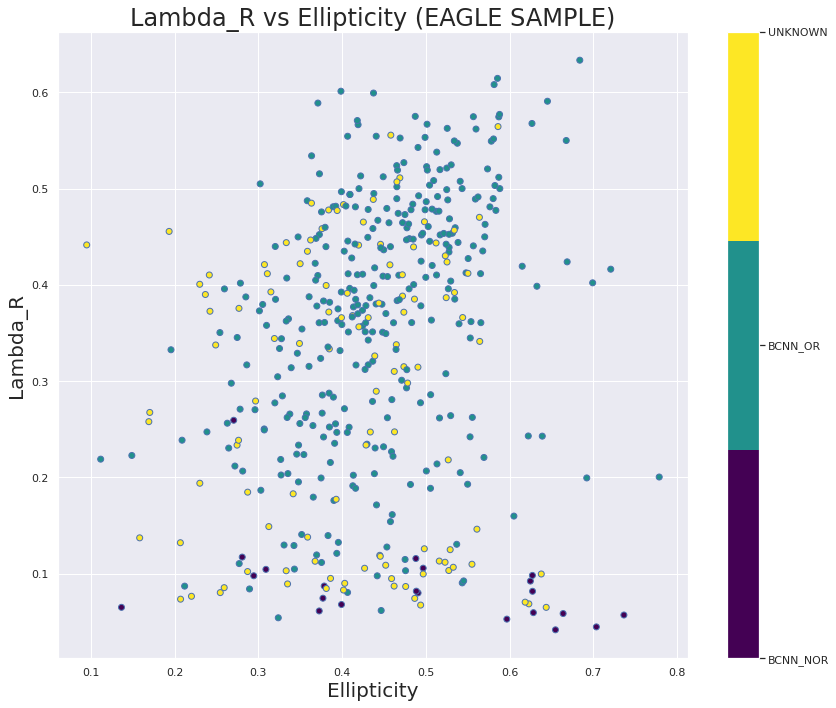

In [ ]:
labels = ['BCNN_NOR', 'BCNN_OR', 'UNKNOWN']
# sns.set_theme()

fig, ax = plt.subplots(figsize = (12, 10))
plt.scatter(eagle_ellip, eagle_lambdar, c = eagle_class, edgecolors='b', cmap = plt.cm.get_cmap('viridis', 3))
plt.xlabel('Ellipticity', fontsize = 20)
plt.ylabel('Lambda_R', fontsize = 20)
plt.title('Lambda_R vs Ellipticity (EAGLE SAMPLE)', fontsize = 24)
# plt.ylim(0, 30)
# plt.xlim(0, 10**11)
# ax.set_facecolor('xkcd:light grey')


# This function formatter will replace integers with target names
formatter = plt.FuncFormatter(lambda val, loc: labels[val])

# We must be sure to specify the ticks matching our target names
plt.colorbar(ticks=[0, 1, 2], format=formatter);
plt.tight_layout()
plt.show()

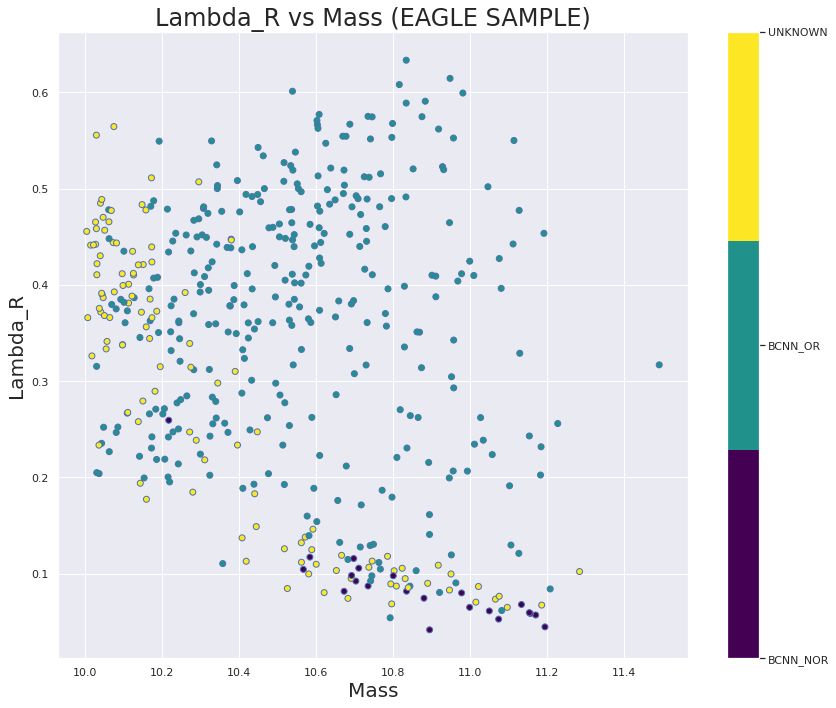

In [ ]:
labels = ['BCNN_NOR', 'BCNN_OR', 'UNKNOWN']
sns.set_theme()

fig, ax = plt.subplots(figsize = (12, 10))
plt.scatter(eagle_lmsol, eagle_lambdar, c = eagle_class, edgecolors='b', cmap = plt.cm.get_cmap('viridis', 3))
plt.xlabel('Mass', fontsize = 20)
plt.ylabel('Lambda_R', fontsize = 20)
plt.title('Lambda_R vs Mass (EAGLE SAMPLE)', fontsize = 24)
# plt.ylim(0, 30)
# plt.xlim(0, 10**11)
# ax.set_facecolor('xkcd:light grey')


# This function formatter will replace integers with target names
formatter = plt.FuncFormatter(lambda val, loc: labels[val])

# We must be sure to specify the ticks matching our target names
plt.colorbar(ticks=[0, 1, 2], format=formatter);
plt.tight_layout()
plt.show()

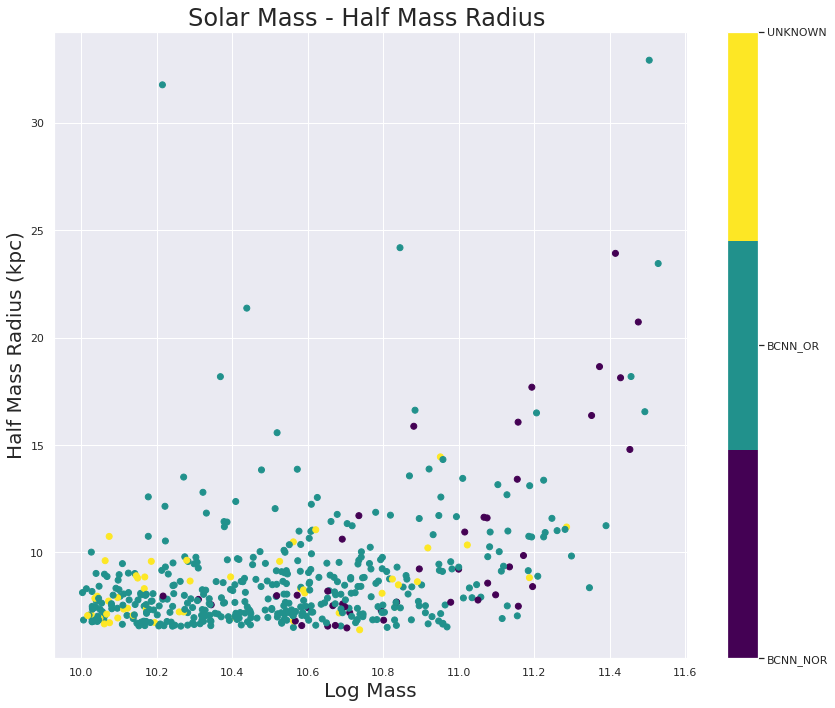

In [ ]:

labels = ['BCNN_NOR', 'BCNN_OR', 'UNKNOWN']
sns.set_theme()

fig, ax = plt.subplots(figsize = (12, 10))
plt.scatter(eagle_lmsol, eagle_r50, c = eagle_class, cmap = plt.cm.get_cmap('viridis', 3))
plt.xlabel('Log Mass', fontsize = 20)
plt.ylabel('Half Mass Radius (kpc)', fontsize = 20)
plt.title('Solar Mass - Half Mass Radius ', fontsize = 24)
# plt.ylim(0, 30)
# plt.xlim(0, 10**11)
# ax.set_facecolor('xkcd:light grey')


# This function formatter will replace integers with target names
formatter = plt.FuncFormatter(lambda val, loc: labels[val])

# We must be sure to specify the ticks matching our target names
plt.colorbar(ticks=[0, 1, 2], format=formatter);
plt.tight_layout()
plt.show()

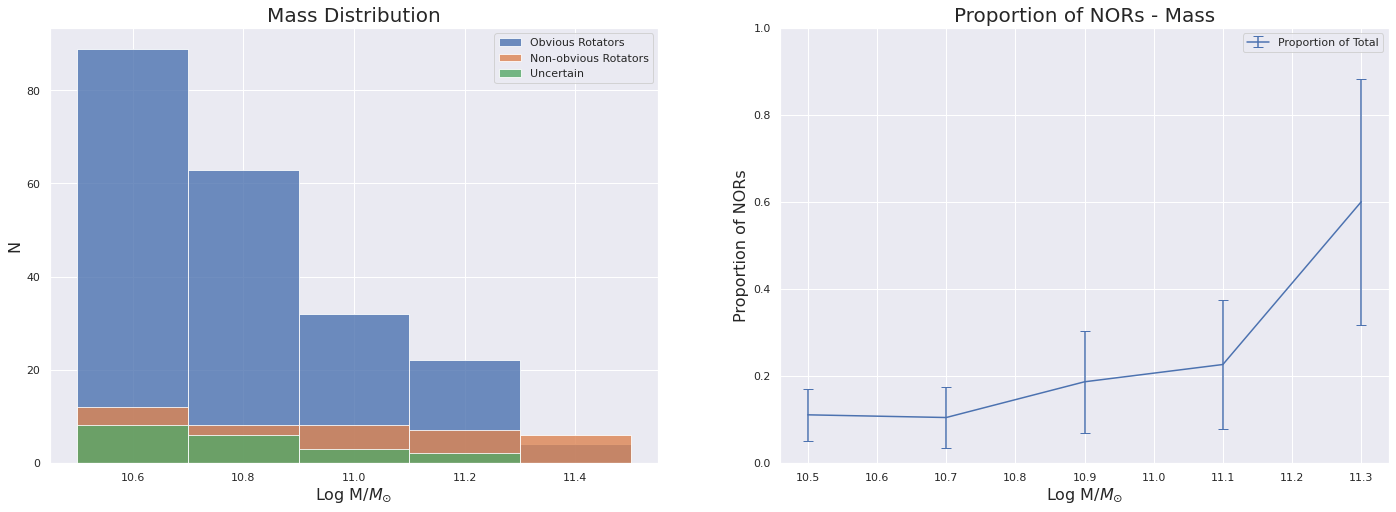

In [ ]:
sns.set_theme()
fig, axs = plt.subplots(1,2, figsize = (24,8))
bins = np.arange(10.5, 11.7, 0.2)
counts, bins, bars = axs[0].hist(eagle_m_sol_OR, alpha = 0.8, bins = bins, label = 'Obvious Rotators')
counts1, bins1, bars1 = axs[0].hist(eagle_m_sol_NOR, alpha = 0.8, bins = bins, label = 'Non-obvious Rotators')
counts2, bins2, bars2 = axs[0].hist(eagle_m_sol_UNKNOWN, alpha = 0.8, bins = bins, label = 'Uncertain')

axs[0].legend()
axs[0].set_title('Mass Distribution', fontsize = 20)
axs[0].set_xlabel('Log M/$M_{\odot}}$', fontsize = 16)
axs[0].set_ylabel('N', fontsize = 16)
# axs[0].set_xscale('log')

error = []
n_vals = []
k_vals = []
prop_vals = []
for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals.append(n)

  k = counts[i]
  k_vals.append(k)
  
  prop = counts[i]/n
  prop_vals.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error.append(p_upper-p_lower)

error = np.array(error)

#Second error plot

error_2 = []
n_vals_2 = []
k_vals_2 = []
prop_vals_2 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals_2.append(n)

  k = counts1[i]
  k_vals_2.append(k)
  
  prop = counts1[i]/n
  prop_vals_2.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_2.append(p_upper-p_lower)


error_2 = np.array(error_2)

error_3 = []
n_vals_3 = []
k_vals_3 = []
prop_vals_3 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i]
  n_vals_3.append(n)

  k = counts[i]
  k_vals_3.append(k)
  
  prop = counts[i]/n
  prop_vals_3.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_3.append(p_upper-p_lower)


error_3 = np.array(error_3)


bins_2 = bins[:-1]
lolims = np.zeros(np.size(counts))

# axs[1].errorbar(bins_2, prop_vals, yerr = error, capsize=5, lolims = lolims, c = 'r', label = 'Proportion of Total')
axs[1].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of Total')
axs[1].legend()
# axs[1].set_xscale('log')
axs[1].set_title('Proportion of NORs - Mass', fontsize = 20)
axs[1].set_ylabel('Proportion of NORs', fontsize = 16)
axs[1].set_xlabel('Log M/$M_{\odot}}$', fontsize = 16)
axs[1].set_ylim(0, 1)

# axs[2].errorbar(bins_2, prop_vals, yerr = error, capsize=5, c = 'r', label = 'Proportion of Total')
# axs[2].errorbar(bins_2, prop_vals_3, yerr = error_3, capsize=5, lolims = lolims, c = 'k', label = 'Proportion of Classified')
# # axs[2].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of Classified')
# axs[2].legend()

# axs[2].set_title('Proportion of ORs - Mass', fontsize = 20)
# axs[2].set_ylabel('Proportion of ORs', fontsize = 16)
# axs[2].set_xlabel('Log M/$M_{\odot}}$', fontsize = 16)
# axs[2].set_ylim(0, 1)

plt.show()

In [ ]:
np.min(eagle_m_sol_OR)

10.517754851309348

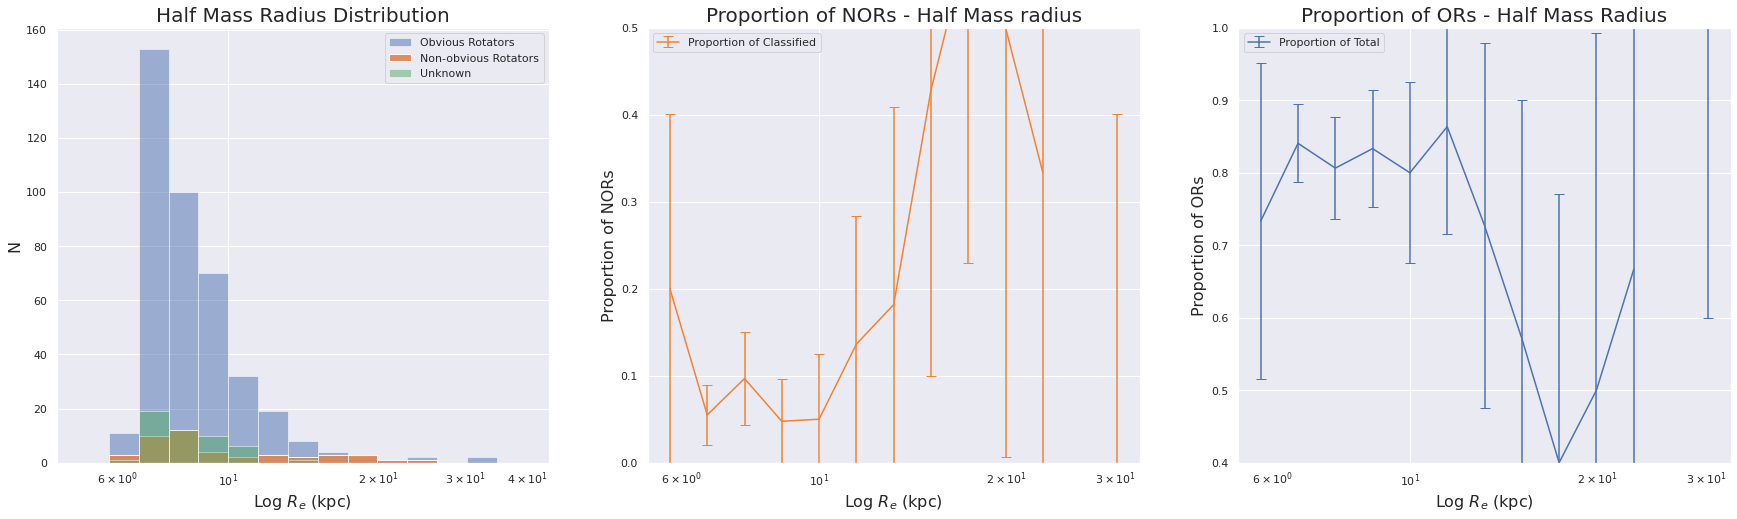

In [ ]:
fig, axs = plt.subplots(1,3, figsize = (30,8))
bins = np.logspace(0.7, 1.6, 16)
# bins = np.arange(5, 25, 5)
counts, bins, bars = axs[0].hist(eagle_r50_OR, alpha = 0.5, bins = bins, label = 'Obvious Rotators')
counts1, bins1, bars1 = axs[0].hist(eagle_r50_NOR, alpha = 0.9, bins = bins, label = 'Non-obvious Rotators')
counts2, bins2, bars2 = axs[0].hist(eagle_r50_UNKNOWN, alpha = 0.5, bins = bins, label = 'Unknown')

error = []
n_vals = []
k_vals = []
prop_vals = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals.append(n)

  k = counts[i]
  k_vals.append(k)
  
  prop = counts[i]/n
  prop_vals.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error.append(p_upper-p_lower)


error = np.array(error)

#Second error plot

error_2 = []
n_vals_2 = []
k_vals_2 = []
prop_vals_2 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals_2.append(n)

  k = counts1[i]
  k_vals_2.append(k)
  
  prop = counts1[i]/n
  prop_vals_2.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_2.append(p_upper-p_lower)


error_2 = np.array(error_2)

error_3 = []
n_vals_3 = []
k_vals_3 = []
prop_vals_3 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i]
  n_vals_3.append(n)

  k = counts[i]
  k_vals_3.append(k)
  
  prop = counts[i]/n
  prop_vals_3.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_3.append(p_upper-p_lower)


error_3 = np.array(error_3)

bins_2 = bins[:-1]
lolims = np.zeros(19)

axs[0].legend()
axs[0].set_title('Half Mass Radius Distribution', fontsize = 20)
axs[0].set_xlabel('Log $R_e$ (kpc)', fontsize = 16)
axs[0].set_ylabel('N', fontsize = 16)
axs[0].set_xscale('log')

# axs[1].errorbar(bins_2, prop_vals, yerr = error, ecolor=None, capsize=5, c = 'r', label = 'Proportion of Total')
axs[1].errorbar(bins_2, prop_vals_2, yerr = error_2, ecolor=None, capsize=5, c = '#F48131', label = 'Proportion of Classified')
axs[1].legend()
axs[1].set_xscale('log')
axs[1].set_title('Proportion of NORs - Half Mass radius', fontsize = 20)
axs[1].set_ylabel('Proportion of NORs', fontsize = 16)
axs[1].set_xlabel('Log $R_e$ (kpc)', fontsize = 16)
axs[1].set_ylim(0, 0.5)

axs[2].errorbar(bins_2, prop_vals, yerr = error, capsize=5, c = 'b', label = 'Proportion of Total')
# axs[2].errorbar(bins_2, prop_vals_3, yerr = error_3, capsize=5, lolims = lolims, c = 'k', label = 'Proportion of Classified')
# axs[2].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of Classified')
axs[2].legend()
axs[2].set_xscale('log')
axs[2].set_title('Proportion of ORs - Half Mass Radius', fontsize = 20)
axs[2].set_ylabel('Proportion of ORs', fontsize = 16)
axs[2].set_xlabel('Log $R_e$ (kpc)', fontsize = 16)
axs[2].set_ylim(0.4, 1)

plt.show()

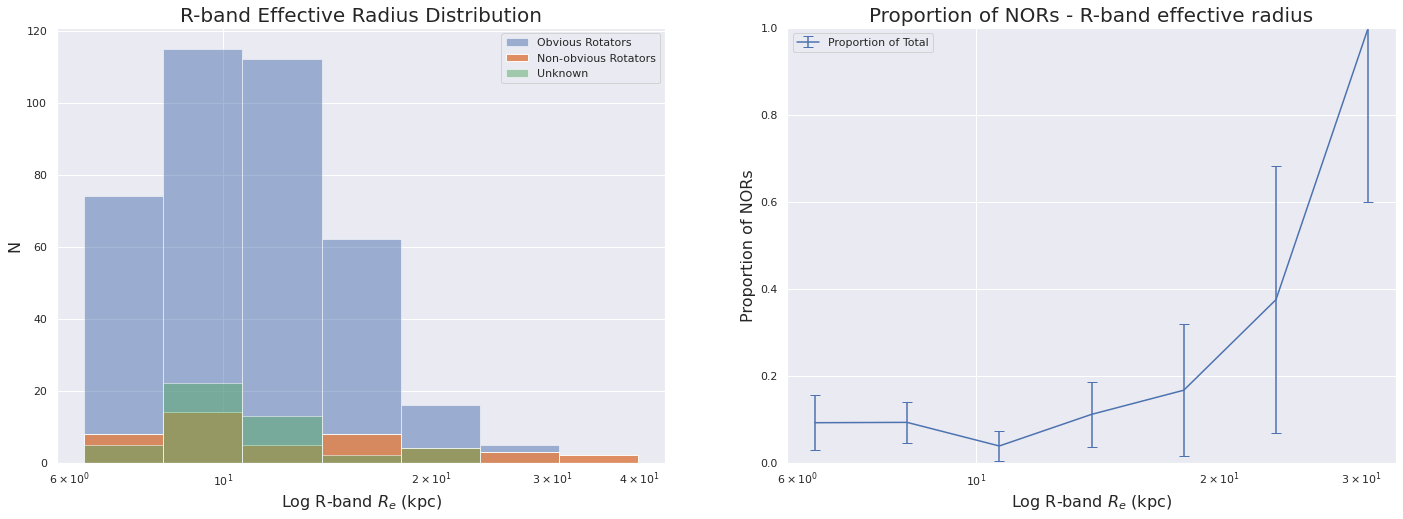

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (24,8))
bins = np.logspace(0.8, 1.6, 8)
# bins = np.arange(5, 25, 5)
counts, bins, bars = axs[0].hist(eagle_re_r_OR, alpha = 0.5, bins = bins, label = 'Obvious Rotators')
counts1, bins1, bars1 = axs[0].hist(eagle_re_r_NOR, alpha = 0.9, bins = bins, label = 'Non-obvious Rotators')
counts2, bins2, bars2 = axs[0].hist(eagle_re_r_UNKNOWN, alpha = 0.5, bins = bins, label = 'Unknown')

error = []
n_vals = []
k_vals = []
prop_vals = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals.append(n)

  k = counts[i]
  k_vals.append(k)
  
  prop = counts[i]/n
  prop_vals.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error.append(p_upper-p_lower)


error = np.array(error)

#Second error plot

error_2 = []
n_vals_2 = []
k_vals_2 = []
prop_vals_2 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals_2.append(n)

  k = counts1[i]
  k_vals_2.append(k)
  
  prop = counts1[i]/n
  prop_vals_2.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_2.append(p_upper-p_lower)


error_2 = np.array(error_2)

error_3 = []
n_vals_3 = []
k_vals_3 = []
prop_vals_3 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i]
  n_vals_3.append(n)

  k = counts[i]
  k_vals_3.append(k)
  
  prop = counts[i]/n
  prop_vals_3.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_3.append(p_upper-p_lower)


error_3 = np.array(error_3)

bins_2 = bins[:-1]
lolims = np.zeros(19)

axs[0].legend()
axs[0].set_title('R-band Effective Radius Distribution', fontsize = 20)
axs[0].set_xlabel('Log R-band $R_e$ (kpc)', fontsize = 16)
axs[0].set_ylabel('N', fontsize = 16)
axs[0].set_xscale('log')

# axs[1].errorbar(bins_2, prop_vals, yerr = error, ecolor=None, capsize=5, c = 'r', label = 'Proportion of Total')
axs[1].errorbar(bins_2, prop_vals_2, yerr = error_2, ecolor=None, capsize=5, c = 'b', label = 'Proportion of Total')
axs[1].legend()
axs[1].set_xscale('log')
axs[1].set_title('Proportion of NORs - R-band effective radius', fontsize = 20)
axs[1].set_ylabel('Proportion of NORs', fontsize = 16)
axs[1].set_xlabel('Log R-band $R_e$ (kpc)', fontsize = 16)
axs[1].set_ylim(0, 1)

# axs[2].errorbar(bins_2, prop_vals, yerr = error, capsize=5, c = 'b', label = 'Proportion of Total')
# # axs[2].errorbar(bins_2, prop_vals_3, yerr = error_3, capsize=5, lolims = lolims, c = 'k', label = 'Proportion of Classified')
# # axs[2].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of Classified')
# axs[2].legend()
# axs[2].set_xscale('log')
# axs[2].set_title('Proportion of ORs - R-band effective radius', fontsize = 20)
# axs[2].set_ylabel('Proportion of ORs', fontsize = 16)
# axs[2].set_xlabel('Log R-band $R_e$ (kpc)', fontsize = 16)
# axs[2].set_ylim(0.4, 1)

plt.show()

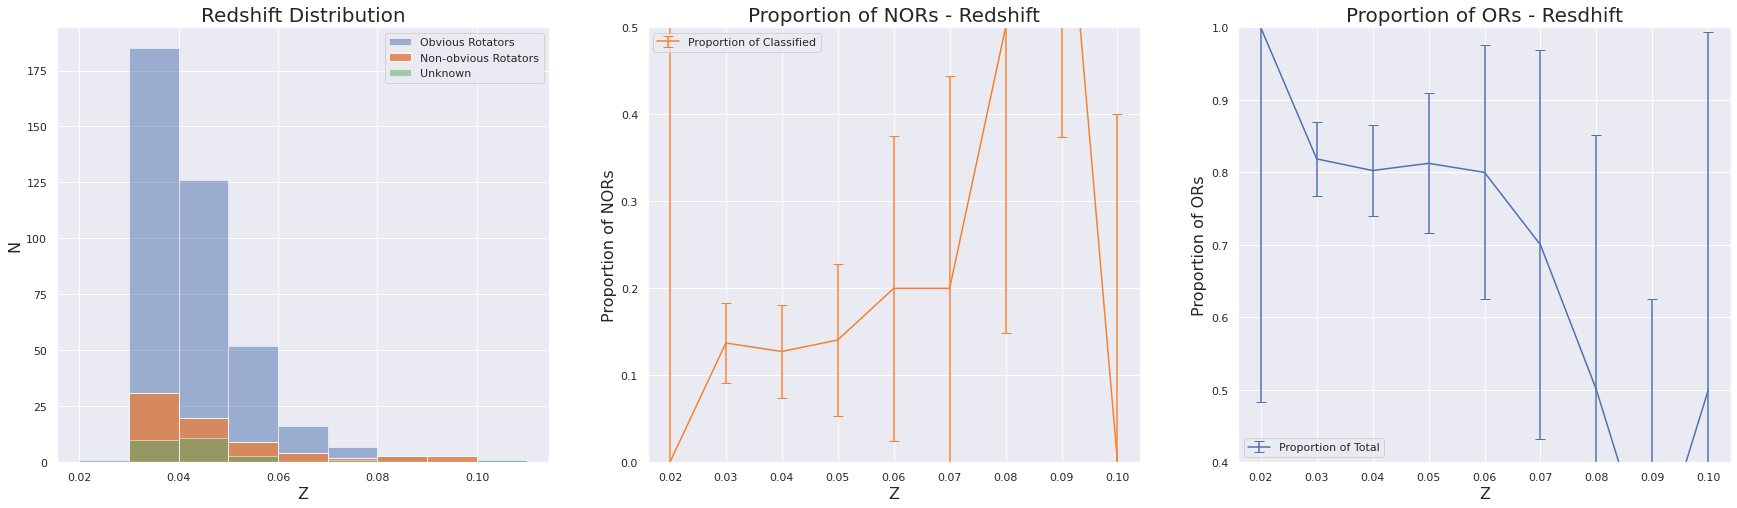

In [ ]:
fig, axs = plt.subplots(1,3, figsize = (30,8))
# bins = np.logspace(0.4, 1.9, 16)
bins = np.arange(0.02, 0.12, 0.01)
counts, bins, bars = axs[0].hist(eagle_z_OR, alpha = 0.5, bins = bins, label = 'Obvious Rotators')
counts1, bins1, bars1 = axs[0].hist(eagle_z_NOR, alpha = 0.9, bins = bins, label = 'Non-obvious Rotators')
counts2, bins2, bars2 = axs[0].hist(eagle_z_UNKNOWN, alpha = 0.5, bins = bins, label = 'Unknown')

error = []
n_vals = []
k_vals = []
prop_vals = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals.append(n)

  k = counts[i]
  k_vals.append(k)
  
  prop = counts[i]/n
  prop_vals.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error.append(p_upper-p_lower)


error = np.array(error)

#Second error plot

error_2 = []
n_vals_2 = []
k_vals_2 = []
prop_vals_2 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals_2.append(n)

  k = counts1[i]
  k_vals_2.append(k)
  
  prop = counts1[i]/n
  prop_vals_2.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_2.append(p_upper-p_lower)


error_2 = np.array(error_2)

error_3 = []
n_vals_3 = []
k_vals_3 = []
prop_vals_3 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i]
  n_vals_3.append(n)

  k = counts[i]
  k_vals_3.append(k)
  
  prop = counts[i]/n
  prop_vals_3.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_3.append(p_upper-p_lower)


error_3 = np.array(error_3)

bins_2 = bins[:-1]
lolims = np.zeros(19)

axs[0].legend()
axs[0].set_title('Redshift Distribution', fontsize = 20)
axs[0].set_xlabel('Z', fontsize = 16)
axs[0].set_ylabel('N', fontsize = 16)
# axs[0].set_xscale('log')

# axs[1].errorbar(bins_2, prop_vals, yerr = error, ecolor=None, capsize=5, c = 'r', label = 'Proportion of Total')
axs[1].errorbar(bins_2, prop_vals_2, yerr = error_2, ecolor=None, capsize=5, c = '#F48131', label = 'Proportion of Classified')
axs[1].legend()
# axs[1].set_xscale('log')
axs[1].set_title('Proportion of NORs - Redshift', fontsize = 20)
axs[1].set_ylabel('Proportion of NORs', fontsize = 16)
axs[1].set_xlabel('Z', fontsize = 16)
axs[1].set_ylim(0, 0.5)

axs[2].errorbar(bins_2, prop_vals, yerr = error, capsize=5, c = 'b', label = 'Proportion of Total')
# axs[2].errorbar(bins_2, prop_vals_3, yerr = error_3, capsize=5, lolims = lolims, c = 'k', label = 'Proportion of Classified')
# axs[2].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of Classified')
axs[2].legend()
# axs[2].set_xscale('log')
axs[2].set_title('Proportion of ORs - Resdhift', fontsize = 20)
axs[2].set_ylabel('Proportion of ORs', fontsize = 16)
axs[2].set_xlabel('Z', fontsize = 16)
axs[2].set_ylim(0.4, 1)

plt.show()

In [ ]:
cat4

EAGLE_ID,LOG_M_SOL,LOG_M_SOL50,R_50,R50_PROJ,RE_RBAND,REDSHIFT,NUM_SPAXEL,CNN_CLASS,CNN_OR_PROB,CNN_NOR_PROB,CNN_STD,LAMBDA_i60,ELLIP_i60,CNN_CLASS_FINAL
bytes8,float64,float64,float64,float64,float64,float64,int32,float32,float32,float32,float32,float64,float64,int64
10011808,10.040349964645454,10.031271391403662,7.747652,5.7337537,9.01736,0.039340654065406544,9,1.0,0.74456203,0.25543803,0.1471472,0.371752535612617,0.384163058201767,1
10029006,10.062383227407933,10.058096131497916,7.0445333,5.2260675,14.4014,0.03574059405940594,21,1.0,0.87013733,0.12986264,0.10882157,0.226662185210112,0.45902421711954,1
10030066,10.12559723124186,10.122400871260382,8.135567,6.0756936,12.8995,0.04186069606960696,30,1.0,0.73563147,0.26436853,0.12784222,0.410208243271709,0.241447009335488,1
10056398,10.14301823085451,10.13610371643002,7.579138,5.764641,11.6776,0.03958065806580658,42,1.0,0.7410872,0.25891277,0.14153594,0.193871412532402,0.230108876738386,1
10058549,10.262478556207952,10.246092283608313,8.655582,6.5884633,7.43958,0.04558075807580758,41,1.0,0.99378073,0.0062192464,0.0060692993,0.451755871184203,0.494820042129029,1
10074039,10.157638635063655,10.150291474467764,8.100819,6.005105,8.54886,0.04126068606860686,20,1.0,0.7573802,0.24261978,0.1398397,0.477734314101225,0.383915751527022,1
10113002,10.153045723200758,10.145691421672876,6.587852,5.07722,10.7361,0.03466057605760576,28,1.0,0.88937443,0.110625595,0.080429666,0.199338178777467,0.374903994055202,1
10138698,10.060840099476822,10.055489379579505,6.8277335,5.286772,8.5687,0.036100600060006004,8,1.0,0.81948996,0.1805101,0.113542095,0.477942847173318,0.49911054970045,1
10139494,10.245357695740854,10.241191376917588,8.08589,6.1232595,10.0066,0.04222070207020702,55,1.0,0.7925221,0.20747796,0.12516837,0.343992024603088,0.327607305696529,1


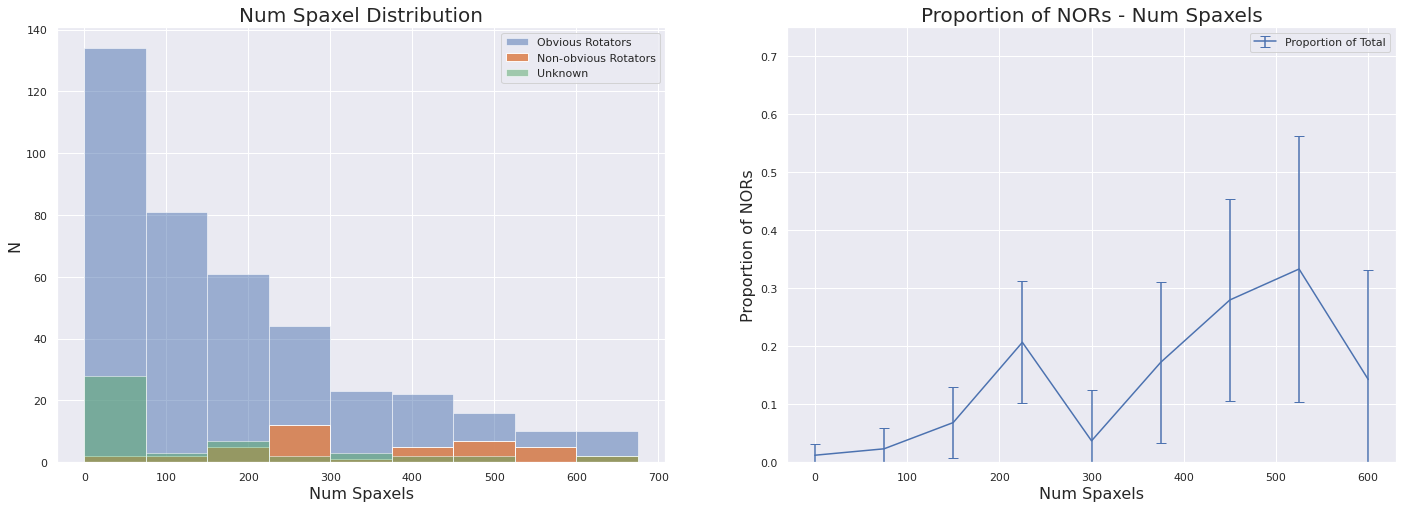

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (24,8))
# bins = np.logspace(0.4, 1.9, 16)
bins = np.arange(0, 750, 75)
counts, bins, bars = axs[0].hist(eagle_spaxels_OR, alpha = 0.5, bins = bins, label = 'Obvious Rotators')
counts1, bins1, bars1 = axs[0].hist(eagle_spaxels_NOR, alpha = 0.9, bins = bins, label = 'Non-obvious Rotators')
counts2, bins2, bars2 = axs[0].hist(eagle_spaxels_UNKNOWN, alpha = 0.5, bins = bins, label = 'Unknown')

error = []
n_vals = []
k_vals = []
prop_vals = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals.append(n)

  k = counts[i]
  k_vals.append(k)
  
  prop = counts[i]/n
  prop_vals.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error.append(p_upper-p_lower)


error = np.array(error)

#Second error plot

error_2 = []
n_vals_2 = []
k_vals_2 = []
prop_vals_2 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals_2.append(n)

  k = counts1[i]
  k_vals_2.append(k)
  
  prop = counts1[i]/n
  prop_vals_2.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_2.append(p_upper-p_lower)


error_2 = np.array(error_2)

error_3 = []
n_vals_3 = []
k_vals_3 = []
prop_vals_3 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i]
  n_vals_3.append(n)

  k = counts[i]
  k_vals_3.append(k)
  
  prop = counts[i]/n
  prop_vals_3.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_3.append(p_upper-p_lower)


error_3 = np.array(error_3)

bins_2 = bins[:-1]
lolims = np.zeros(19)

axs[0].legend()
axs[0].set_title('Num Spaxel Distribution', fontsize = 20)
axs[0].set_xlabel('Num Spaxels', fontsize = 16)
axs[0].set_ylabel('N', fontsize = 16)
# axs[0].set_xscale('log')

# axs[1].errorbar(bins_2, prop_vals, yerr = error, ecolor=None, capsize=5, c = 'r', label = 'Proportion of Total')
axs[1].errorbar(bins_2, prop_vals_2, yerr = error_2, ecolor=None, capsize=5, c = 'b', label = 'Proportion of Total')
axs[1].legend()
# axs[1].set_xscale('log')
axs[1].set_title('Proportion of NORs - Num Spaxels', fontsize = 20)
axs[1].set_ylabel('Proportion of NORs', fontsize = 16)
axs[1].set_xlabel('Num Spaxels', fontsize = 16)
axs[1].set_ylim(0, 0.75)

# axs[2].errorbar(bins_2, prop_vals, yerr = error, capsize=5, c = 'b', label = 'Proportion of Total')
# # axs[2].errorbar(bins_2, prop_vals_3, yerr = error_3, capsize=5, lolims = lolims, c = 'k', label = 'Proportion of Classified')
# # axs[2].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of Classified')
# axs[2].legend()
# # axs[2].set_xscale('log')
# axs[2].set_title('Proportion of ORs - Resdhift', fontsize = 20)
# axs[2].set_ylabel('Proportion of ORs', fontsize = 16)
# axs[2].set_xlabel('Z', fontsize = 16)
# axs[2].set_ylim(0.4, 1)

plt.show()

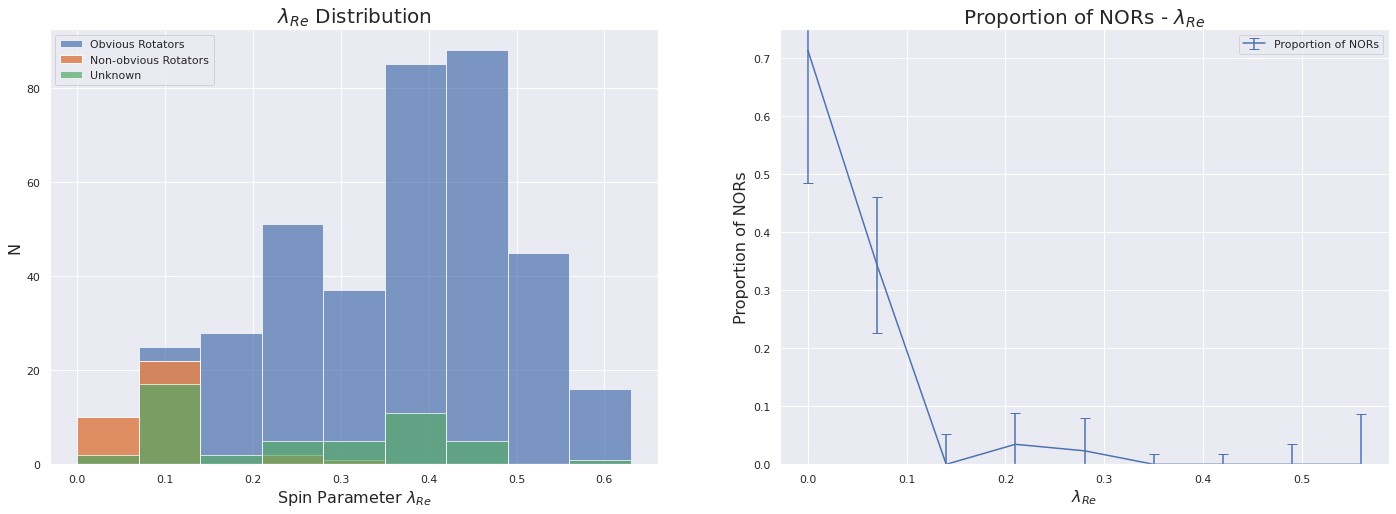

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (24,8))
# bins = np.logspace(0.4, 1.9, 16)
bins = np.arange(0, 0.7, 0.07)
counts, bins, bars = axs[0].hist(eagle_lambdar_OR, alpha = 0.7, bins = bins, label = 'Obvious Rotators')
counts1, bins1, bars1 = axs[0].hist(eagle_lambdar_NOR, alpha = 0.9, bins = bins, label = 'Non-obvious Rotators')
counts2, bins2, bars2 = axs[0].hist(eagle_lambdar_UNKNOWN, alpha = 0.7, bins = bins, label = 'Unknown')

error = []
n_vals = []
k_vals = []
prop_vals = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals.append(n)

  k = counts[i]
  k_vals.append(k)
  
  prop = counts2[i]/n
  prop_vals.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error.append(p_upper-p_lower)


error = np.array(error)

#Second error plot

error_2 = []
n_vals_2 = []
k_vals_2 = []
prop_vals_2 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals_2.append(n)

  k = counts1[i]
  k_vals_2.append(k)
  
  prop = counts1[i]/n
  prop_vals_2.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_2.append(p_upper-p_lower)


error_2 = np.array(error_2)

error_3 = []
n_vals_3 = []
k_vals_3 = []
prop_vals_3 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i]
  n_vals_3.append(n)

  k = counts[i]
  k_vals_3.append(k)
  
  prop = counts[i]/n
  prop_vals_3.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_3.append(p_upper-p_lower)


error_3 = np.array(error_3)

bins_2 = bins[:-1]
lolims = np.zeros(19)

axs[0].legend()
axs[0].set_title('$\lambda_{Re}$ Distribution', fontsize = 20)
axs[0].set_xlabel('Spin Parameter $\lambda_{Re}$', fontsize = 16)
axs[0].set_ylabel('N', fontsize = 16)
# axs[0].set_xscale('log')

# axs[1].errorbar(bins_2, prop_vals, yerr = error, ecolor=None, capsize=5, c = 'r', label = 'Proportion of Unknown')
axs[1].errorbar(bins_2, prop_vals_2, yerr = error_2, ecolor=None, capsize=5, c = 'b', label = 'Proportion of NORs')
axs[1].legend()
# axs[1].set_xscale('log')
axs[1].set_title('Proportion of NORs - $\lambda_{Re}$', fontsize = 20)
axs[1].set_ylabel('Proportion of NORs', fontsize = 16)
axs[1].set_xlabel('$\lambda_{Re}$', fontsize = 16)
axs[1].set_ylim(0, 0.75)

# axs[2].errorbar(bins_2, prop_vals, yerr = error, capsize=5, c = 'b', label = 'Proportion of Total')
# # axs[2].errorbar(bins_2, prop_vals_3, yerr = error_3, capsize=5, lolims = lolims, c = 'k', label = 'Proportion of Classified')
# # axs[2].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of Classified')
# axs[2].legend()
# # axs[2].set_xscale('log')
# axs[2].set_title('Proportion of ORs - Resdhift', fontsize = 20)
# axs[2].set_ylabel('Proportion of ORs', fontsize = 16)
# axs[2].set_xlabel('Z', fontsize = 16)
# axs[2].set_ylim(0.4, 1)

plt.show()

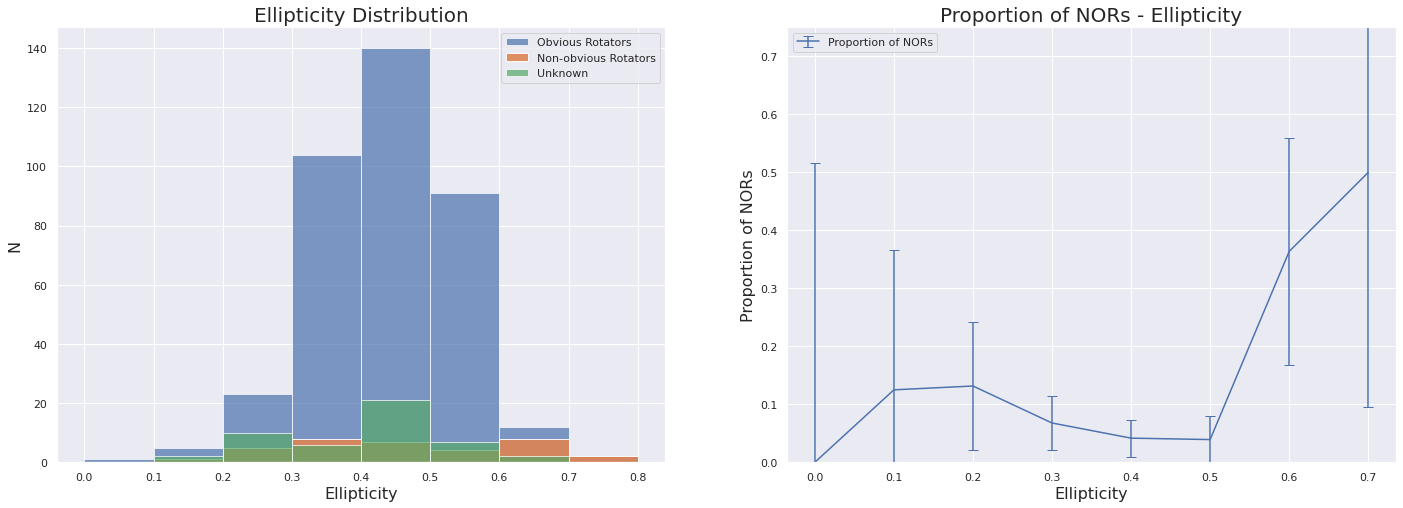

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (24,8))
# bins = np.logspace(0.4, 1.9, 16)
bins = np.arange(0, 0.9, 0.1)
counts, bins, bars = axs[0].hist(eagle_ellip_OR, alpha = 0.7, bins = bins, label = 'Obvious Rotators')
counts1, bins1, bars1 = axs[0].hist(eagle_ellip_NOR, alpha = 0.9, bins = bins, label = 'Non-obvious Rotators')
counts2, bins2, bars2 = axs[0].hist(eagle_ellip_UNKNOWN, alpha = 0.7, bins = bins, label = 'Unknown')

error = []
n_vals = []
k_vals = []
prop_vals = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals.append(n)

  k = counts[i]
  k_vals.append(k)
  
  prop = counts2[i]/n
  prop_vals.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error.append(p_upper-p_lower)


error = np.array(error)

#Second error plot

error_2 = []
n_vals_2 = []
k_vals_2 = []
prop_vals_2 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals_2.append(n)

  k = counts1[i]
  k_vals_2.append(k)
  
  prop = counts1[i]/n
  prop_vals_2.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_2.append(p_upper-p_lower)


error_2 = np.array(error_2)

error_3 = []
n_vals_3 = []
k_vals_3 = []
prop_vals_3 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i]
  n_vals_3.append(n)

  k = counts[i]
  k_vals_3.append(k)
  
  prop = counts[i]/n
  prop_vals_3.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_3.append(p_upper-p_lower)


error_3 = np.array(error_3)

bins_2 = bins[:-1]
lolims = np.zeros(19)

axs[0].legend()
axs[0].set_title('Ellipticity Distribution', fontsize = 20)
axs[0].set_xlabel('Ellipticity', fontsize = 16)
axs[0].set_ylabel('N', fontsize = 16)
# axs[0].set_xscale('log')

# axs[1].errorbar(bins_2, prop_vals, yerr = error, ecolor=None, capsize=5, c = 'r', label = 'Proportion of Unknown')
axs[1].errorbar(bins_2, prop_vals_2, yerr = error_2, ecolor=None, capsize=5, c = 'b', label = 'Proportion of NORs')
axs[1].legend()
# axs[1].set_xscale('log')
axs[1].set_title('Proportion of NORs - Ellipticity', fontsize = 20)
axs[1].set_ylabel('Proportion of NORs', fontsize = 16)
axs[1].set_xlabel('Ellipticity', fontsize = 16)
axs[1].set_ylim(0, 0.75)

# axs[2].errorbar(bins_2, prop_vals, yerr = error, capsize=5, c = 'b', label = 'Proportion of Total')
# # axs[2].errorbar(bins_2, prop_vals_3, yerr = error_3, capsize=5, lolims = lolims, c = 'k', label = 'Proportion of Classified')
# # axs[2].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of Classified')
# axs[2].legend()
# # axs[2].set_xscale('log')
# axs[2].set_title('Proportion of ORs - Resdhift', fontsize = 20)
# axs[2].set_ylabel('Proportion of ORs', fontsize = 16)
# axs[2].set_xlabel('Z', fontsize = 16)
# axs[2].set_ylim(0.4, 1)

plt.show()